In [5]:
library(tidyverse)
library(purrr)

# Import and Tidy:

Initial Import:

In [6]:
movies <- read_csv("supporting_files/movie_metadata.csv")
head(movies)

Parsed with column specification:
cols(
  .default = col_integer(),
  color = col_character(),
  director_name = col_character(),
  actor_2_name = col_character(),
  genres = col_character(),
  actor_1_name = col_character(),
  movie_title = col_character(),
  actor_3_name = col_character(),
  plot_keywords = col_character(),
  movie_imdb_link = col_character(),
  language = col_character(),
  country = col_character(),
  content_rating = col_character(),
  imdb_score = col_double(),
  aspect_ratio = col_double()
)
See spec(...) for full column specifications.
Warning message:
“4 parsing failures.
 row    col   expected      actual                                  file
2324 budget an integer 2400000000  'supporting_files/movie_metadata.csv'
2989 budget an integer 12215500000 'supporting_files/movie_metadata.csv'
3006 budget an integer 2500000000  'supporting_files/movie_metadata.csv'
3860 budget an integer 4200000000  'supporting_files/movie_metadata.csv'
”

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


Transpose to make easier to understand:

In [7]:
glimpse(movies)

Observations: 5,043
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color", NA, "...
$ director_name             <chr> "James Cameron", "Gore Verbinski", "Sam M...
$ num_critic_for_reviews    <int> 723, 302, 602, 813, NA, 462, 392, 324, 63...
$ duration                  <int> 178, 169, 148, 164, NA, 132, 156, 100, 14...
$ director_facebook_likes   <int> 0, 563, 0, 22000, 131, 475, 0, 15, 0, 282...
$ actor_3_facebook_likes    <int> 855, 1000, 161, 23000, NA, 530, 4000, 284...
$ actor_2_name              <chr> "Joel David Moore", "Orlando Bloom", "Ror...
$ actor_1_facebook_likes    <int> 1000, 40000, 11000, 27000, 131, 640, 2400...
$ gross                     <int> 760505847, 309404152, 200074175, 44813064...
$ genres                    <chr> "Action|Adventure|Fantasy|Sci-Fi", "Actio...
$ actor_1_name              <chr> "CCH Pounder", "Johnny Depp", "Christoph ...
$ movie_title               <chr> "Avatar ", "Pirates of the Caribbean: At ...
$ num_voted_users 

Examine parsing errors:

In [8]:
parse_errs <- problems(movies)
parse_errs

row,col,expected,actual,file
2324,budget,an integer,2400000000,'supporting_files/movie_metadata.csv'
2989,budget,an integer,12215500000,'supporting_files/movie_metadata.csv'
3006,budget,an integer,2500000000,'supporting_files/movie_metadata.csv'
3860,budget,an integer,4200000000,'supporting_files/movie_metadata.csv'


Why such high budgets? Pull out each row and transpose to see details:

In [9]:
prob_values <- movies[parse_errs$row,]
glimpse(prob_values)

Observations: 4
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color"
$ director_name             <chr> "Hayao Miyazaki", "Joon-ho Bong", "Lajos ...
$ num_critic_for_reviews    <int> 174, 363, 73, 202
$ duration                  <int> 134, 110, 134, 112
$ director_facebook_likes   <int> 6000, 584, 45, 0
$ actor_3_facebook_likes    <int> 745, 74, 0, 38
$ actor_2_name              <chr> "Jada Pinkett Smith", "Kang-ho Song", "Pé...
$ actor_1_facebook_likes    <int> 893, 629, 9, 717
$ gross                     <int> 2298191, 2201412, 195888, 211667
$ genres                    <chr> "Adventure|Animation|Fantasy", "Comedy|Dr...
$ actor_1_name              <chr> "Minnie Driver", "Doona Bae", "Marcell Na...
$ movie_title               <chr> "Princess Mononoke ", "The Host ", "Fatel...
$ num_voted_users           <int> 221552, 68883, 5603, 53508
$ cast_total_facebook_likes <int> 2710, 1173, 11, 907
$ actor_3_name              <chr> "Billy Crudup", "Ah-sung Ko", "Bál

All international films - I'm betting they're showing the `budget` column all in a foreign currency. Note, Tibble framework sets all parsing errors to `NA`, so I'll disregard for now and let them be `NA`.

Finally, look at summary of data frame to understand even better:

In [10]:
summary(movies)

    color           director_name      num_critic_for_reviews    duration    
 Length:5043        Length:5043        Min.   :  1.0          Min.   :  7.0  
 Class :character   Class :character   1st Qu.: 50.0          1st Qu.: 93.0  
 Mode  :character   Mode  :character   Median :110.0          Median :103.0  
                                       Mean   :140.2          Mean   :107.2  
                                       3rd Qu.:195.0          3rd Qu.:118.0  
                                       Max.   :813.0          Max.   :511.0  
                                       NA's   :50             NA's   :15     
 director_facebook_likes actor_3_facebook_likes actor_2_name      
 Min.   :    0.0         Min.   :    0.0        Length:5043       
 1st Qu.:    7.0         1st Qu.:  133.0        Class :character  
 Median :   49.0         Median :  371.5        Mode  :character  
 Mean   :  686.5         Mean   :  645.0                          
 3rd Qu.:  194.5         3rd Qu.:  636.0 

Things to keep an eye on from looking at summary again:

* multiple variables have `NA` instead of a value. Ones to be aware of:
  * `duration`: strange that a movie's duration is unknown. Thankfully only 15 instances.
  * `budget`: also strange if no value here, but for the 4 instances of foreign film I found, makes sense. Many more here, at 496.
  * `title_year`: each film definitely has a year it was finished, so strange that 108 instances
  * `aspect_ratio`: 329 instances. But note not really interesting variable given aspect ratio is often modified for some films (3:4 to 16:9)
  * some values may be very excessive - like in `budget`, which has a max of approximatel 2,128,000,000. I'm sure never been movie made for over two billion dollars

Is the data "tidy"?:

* each variable has its own column? Of the 28 variables shown, each represents a unique type of measurement. Check.
* each observation has its own row? Yes, no values exist that branch out into their own measurements. Check.
* each value has its own cell? No, but will treat `plot_keywords` and `generes` as-is. Notes:
  * `genres` is up to five genre keywords in alphabetical order and strings restricted to a representative keyword (ex. there is SciFi but no Scifi). Can leverage this by treating each unique combination as a measurement.
  * `plot_keywords` has a small number of keywords, but nearly infinite number of combinations of any word or short phrase from human language. So leaving this as-is (but possibly using n-grams or something else)
 
Finally, are there any duplicate observations?

In [11]:
dupes <- which(duplicated(movies))
dupes
head(movies[dupes,])

[1]  138  188  205  304  390  396  591  657  795 1221 1306 1450 2170 2293 2473
[16] 2494 2534 2563 2569 2620 2772 2778 2799 2972 3118 3346 3453 3481 3730 3901
[31] 3916 4183 4227 4283 4314 4409 4566 4574 4632 4770 4883 4928 4943 4951 4952

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,David Yates,248,110,282,103,Alexander Skarsgård,11000,124051759,Action|Adventure|Drama|Romance,⋯,239,English,USA,PG-13,180000000,2016,10000,6.6,2.35,29000
Color,Bill Condon,322,115,386,12000,Kristen Stewart,21000,292298923,Adventure|Drama|Fantasy|Romance,⋯,329,English,USA,PG-13,120000000,2012,17000,5.5,2.35,65000
Color,Hideaki Anno,1,120,28,12,Shin'ya Tsukamoto,544,NA,Action|Adventure|Drama|Horror|Sci-Fi,⋯,13,Japanese,Japan,NA,NA,2016,106,8.2,2.35,0
Color,Joe Wright,256,111,456,394,Cara Delevingne,20000,34964818,Adventure|Family|Fantasy,⋯,186,English,USA,PG,150000000,2015,548,5.8,2.35,24000
Color,Josh Trank,369,100,128,78,Reg E. Cathey,596,56114221,Action|Adventure|Sci-Fi,⋯,695,English,USA,PG-13,120000000,2015,360,4.3,2.35,41000
Color,Rob Cohen,187,106,357,4000,Vin Diesel,23000,144512310,Action|Crime|Thriller,⋯,988,English,USA,PG-13,38000000,2001,14000,6.7,2.35,14000


Yes, so create new data frame that removes all duplicate observations:

In [12]:
movies <- movies[which(!duplicated(movies)),]
head(movies)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


In [13]:
summary(movies)

    color           director_name      num_critic_for_reviews    duration    
 Length:4998        Length:4998        Min.   :  1.0          Min.   :  7.0  
 Class :character   Class :character   1st Qu.: 50.0          1st Qu.: 93.0  
 Mode  :character   Mode  :character   Median :110.0          Median :103.0  
                                       Mean   :139.9          Mean   :107.2  
                                       3rd Qu.:195.0          3rd Qu.:118.0  
                                       Max.   :813.0          Max.   :511.0  
                                       NA's   :49             NA's   :15     
 director_facebook_likes actor_3_facebook_likes actor_2_name      
 Min.   :    0.0         Min.   :    0.0        Length:4998       
 1st Qu.:    7.0         1st Qu.:  133.0        Class :character  
 Median :   49.0         Median :  369.0        Mode  :character  
 Mean   :  688.7         Mean   :  639.9                          
 3rd Qu.:  192.0         3rd Qu.:  635.0 

Left with 4,998 rows. So in summary, checked for parsing errors, reviewed data frame for NA and extreme values, checked if tidy, removed duplicates. Good to go!

### Review/document data and its structure
So what do I have here? No documentation on Kaggle. Looked at spreadsheet and compared against web page for a given movie. My best guesses for variables and what they mean (only ones that are not obvious):

Look at all variables:

In [14]:
colnames(movies)

[1] "color"                     "director_name"            
 [3] "num_critic_for_reviews"    "duration"                 
 [5] "director_facebook_likes"   "actor_3_facebook_likes"   
 [7] "actor_2_name"              "actor_1_facebook_likes"   
 [9] "gross"                     "genres"                   
[11] "actor_1_name"              "movie_title"              
[13] "num_voted_users"           "cast_total_facebook_likes"
[15] "actor_3_name"              "facenumber_in_poster"     
[17] "plot_keywords"             "movie_imdb_link"          
[19] "num_user_for_reviews"      "language"                 
[21] "country"                   "content_rating"           
[23] "budget"                    "title_year"               
[25] "actor_2_facebook_likes"    "imdb_score"               
[27] "aspect_ratio"              "movie_facebook_likes"

* `num_critic_for_reviews`: number of IMDB movie-critic-generated star/text reviews
* `num_voted_users`: number of IMDB user-generated star-only reviews on a scale of 1-10
* `num_user_for_reviews`: number of IMDB regular-user-generated star/text reviews

Ok, data is now tidy and documented well-enough. Moving on to EDA.

# EDA (Visualize <-> Transform <-> Model)
Review data set again:

In [15]:
glimpse(movies)

Observations: 4,998
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color", NA, "...
$ director_name             <chr> "James Cameron", "Gore Verbinski", "Sam M...
$ num_critic_for_reviews    <int> 723, 302, 602, 813, NA, 462, 392, 324, 63...
$ duration                  <int> 178, 169, 148, 164, NA, 132, 156, 100, 14...
$ director_facebook_likes   <int> 0, 563, 0, 22000, 131, 475, 0, 15, 0, 282...
$ actor_3_facebook_likes    <int> 855, 1000, 161, 23000, NA, 530, 4000, 284...
$ actor_2_name              <chr> "Joel David Moore", "Orlando Bloom", "Ror...
$ actor_1_facebook_likes    <int> 1000, 40000, 11000, 27000, 131, 640, 2400...
$ gross                     <int> 760505847, 309404152, 200074175, 44813064...
$ genres                    <chr> "Action|Adventure|Fantasy|Sci-Fi", "Actio...
$ actor_1_name              <chr> "CCH Pounder", "Johnny Depp", "Christoph ...
$ movie_title               <chr> "Avatar ", "Pirates of the Caribbean: At ...
$ num_voted_users 

Now a very quick and dirty plot:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2043 rows containing non-finite values (stat_bin).”

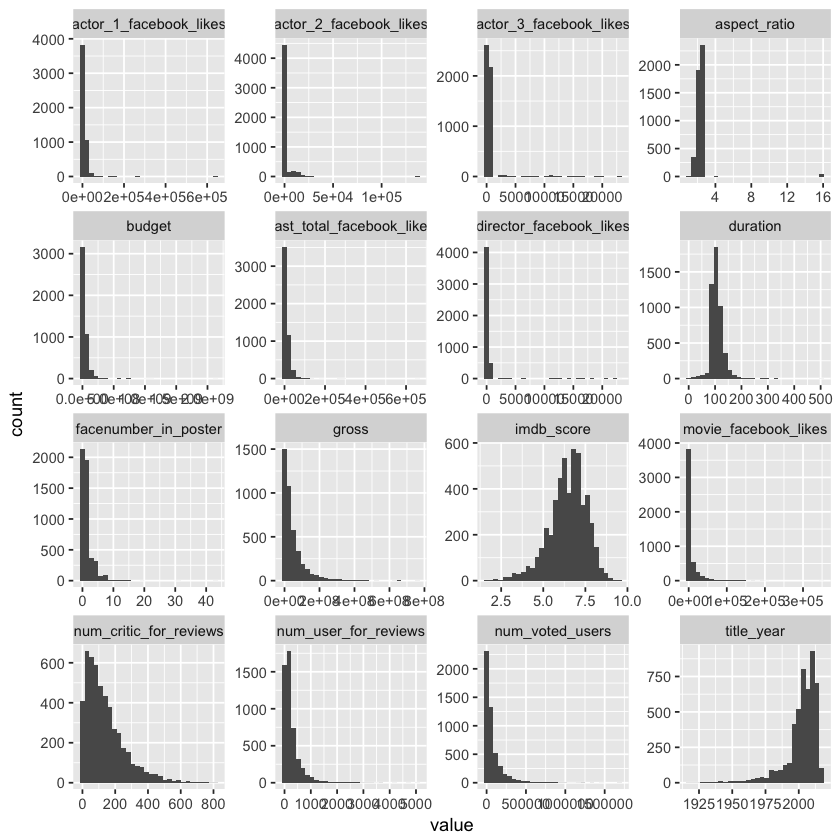

In [16]:
library(purrr)

movies %>%
    keep(is.numeric) %>%
    gather() %>%
    ggplot(aes(x = value)) +
        facet_wrap(~ key, scales = "free") +
        geom_histogram()

Some of these plots are highly skewed and make it difficult to see well (the top row for example). I would like to transform a few of them to log scale:

Starting with all facebook like plots:
* actor_1_facebook_likes
* actor_2_facebook_likes
* actor_3_facebook_likes
* cast_total_facebook_likes
* director_facebook_likes
* movie_facebook_likes

First, make subset of data frame:

In [17]:
movies_fb <- movies %>%
    select(actor_1_facebook_likes,
          actor_2_facebook_likes,
          actor_3_facebook_likes,
          cast_total_facebook_likes,
          director_facebook_likes,
          movie_facebook_likes)
head(movies_fb)

actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,director_facebook_likes,movie_facebook_likes
1000,936,855,4834,0,33000
40000,5000,1000,48350,563,0
11000,393,161,11700,0,85000
27000,23000,23000,106759,22000,164000
131,12,NA,143,131,0
640,632,530,1873,475,24000


Now plot them with log base 10 transformation: Note, restricted to more than 0 fb likes:

In [119]:
# find max value in each column
apply(movies_fb, 2, min, na.rm = TRUE)
apply(movies_fb, 2, max, na.rm = TRUE)
apply(movies_fb, 2, sum, na.rm = TRUE)

actor_1_facebook_likes    actor_2_facebook_likes    actor_3_facebook_likes 
                        0                         0                         0 
cast_total_facebook_likes   director_facebook_likes      movie_facebook_likes 
                        0                         0                         0

actor_1_facebook_likes    actor_2_facebook_likes    actor_3_facebook_likes 
                   640000                    137000                     23000 
cast_total_facebook_likes   director_facebook_likes      movie_facebook_likes 
                   656730                     23000                    349000

actor_1_facebook_likes    actor_2_facebook_likes    actor_3_facebook_likes 
                 32725687                   8190349                   3183507 
cast_total_facebook_likes   director_facebook_likes      movie_facebook_likes 
                 48365352                   3371084                  37422176

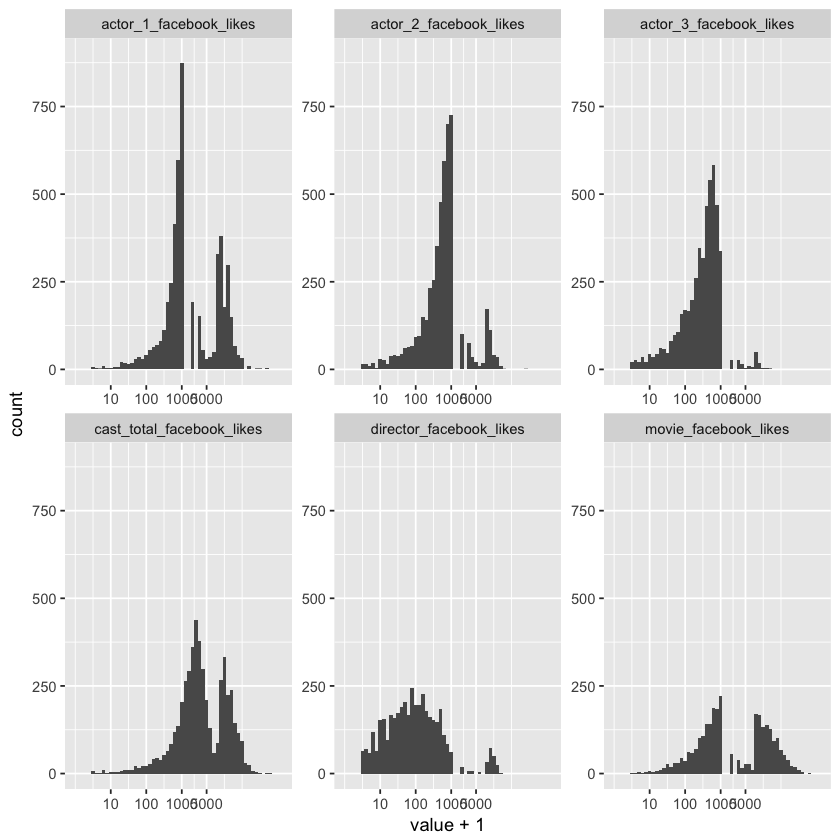

In [117]:
movies_fb %>%
    gather() %>%
    ggplot(aes(x = value + 1)) +
        geom_histogram(binwidth = .1, na.rm = TRUE) +
        scale_x_log10(breaks = c(10, 100, 1000, 5000), limits = c(1,650000)) +
        ylim(0, 900) +
        facet_wrap(~ key, scales = "free")

So now I've taken the log of all x value fb likes and binned them in a histogram. This has condensed the positive tail into my bins to give me a different perspective on an exponentially increasing x ticks scale.

And now everything else individually:

* budget
* gross
* num_user_for_reviews
* num_voted_users

In [22]:
movies_specs <- movies %>%
    select(budget,
          gross,
          num_user_for_reviews,
          num_voted_users)
head(movies_specs)

budget,gross,num_user_for_reviews,num_voted_users
237000000,760505847,3054,886204
300000000,309404152,1238,471220
245000000,200074175,994,275868
250000000,448130642,2701,1144337
NA,NA,NA,8
263700000,73058679,738,212204


In [130]:
# find max value in each column
apply(movies_specs, 2, min, na.rm = TRUE)
apply(movies_specs, 2, max, na.rm = TRUE)
#note, budget and gross to high to add up for r
apply(movies_specs, 2, sum, na.rm = TRUE)

budget                gross num_user_for_reviews 
                 218                  162                    1 
     num_voted_users 
                   5

budget                gross num_user_for_reviews 
          2127519898            760505847                 5060 
     num_voted_users 
             1689764

Warning message in FUN(newX[, i], ...):
“integer overflow - use sum(as.numeric(.))”Warning message in FUN(newX[, i], ...):
“integer overflow - use sum(as.numeric(.))”

budget                gross num_user_for_reviews 
                  NA                   NA              1353817 
     num_voted_users 
           417184053

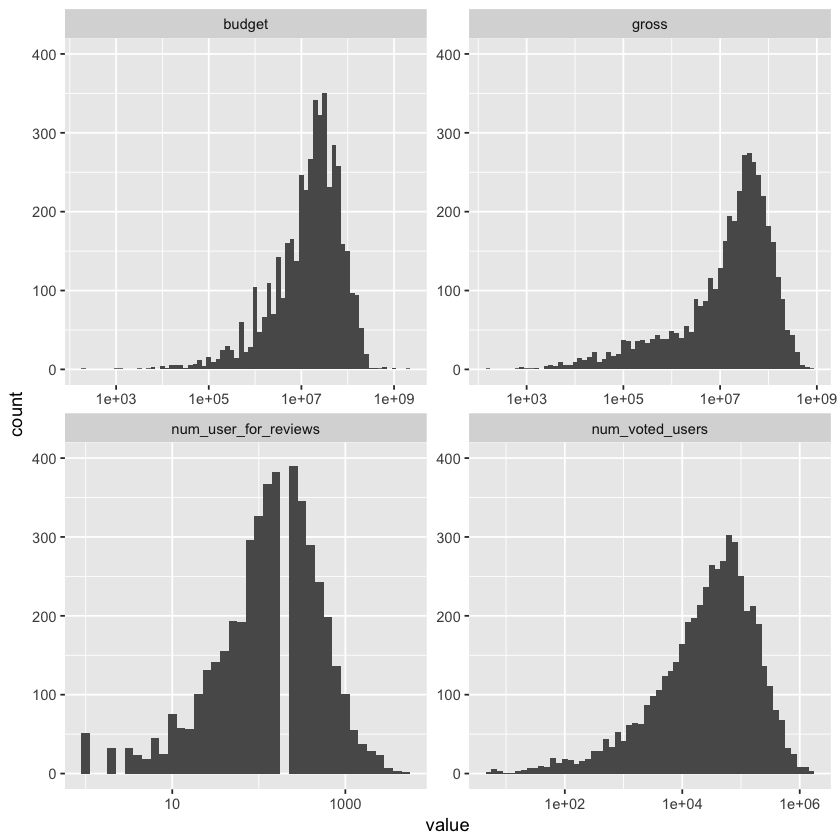

In [137]:
movies_specs %>%
    gather() %>%
    ggplot(aes(x = value)) +
        geom_histogram(binwidth = .1, na.rm = TRUE) +
        scale_x_log10() +
        ylim(0, 400) +
        facet_wrap(~ key, scales = "free")

In [148]:
user_reviews <- movies %>%
    select(num_user_for_reviews) %>%
    filter(num_user_for_reviews > 0) %>%
    mutate(log_num_user_for_reviews = log10(num_user_for_reviews))
user_reviews

num_user_for_reviews,log_num_user_for_reviews
3054,3.484869
1238,3.092721
994,2.997386
2701,3.431525
738,2.868056
1902,3.279211
387,2.587711
1117,3.048053
973,2.988113
3018,3.479719


In [162]:
write.csv(x = dput(user_reviews), file = "my_csv.csv")

structure(list(num_user_for_reviews = c(3054L, 1238L, 994L, 2701L, 
738L, 1902L, 387L, 1117L, 973L, 3018L, 2367L, 1243L, 1832L, 711L, 
2536L, 438L, 1722L, 484L, 341L, 802L, 1225L, 546L, 951L, 666L, 
2618L, 2528L, 1022L, 751L, 1290L, 1498L, 1303L, 1187L, 736L, 
1912L, 265L, 1439L, 918L, 511L, 1067L, 665L, 283L, 550L, 733L, 
974L, 657L, 995L, 752L, 1171L, 205L, 753L, 453L, 1106L, 899L, 
2054L, 345L, 428L, 432L, 1043L, 221L, 1055L, 249L, 720L, 239L, 
1463L, 622L, 4667L, 704L, 187L, 1055L, 678L, 648L, 501L, 971L, 
257L, 741L, 309L, 534L, 773L, 398L, 723L, 710L, 634L, 620L, 15L, 
324L, 742L, 173L, 497L, 433L, 345L, 444L, 520L, 492L, 1676L, 
1097L, 2725L, 2803L, 13L, 1367L, 988L, 822L, 698L, 383L, 238L, 
629L, 131L, 326L, 781L, 867L, 227L, 1999L, 1782L, 1390L, 1108L, 
1896L, 590L, 1413L, 1361L, 626L, 2685L, 119L, 209L, 641L, 2121L, 
904L, 2789L, 532L, 1588L, 435L, 738L, 178L, 90L, 253L, 479L, 
440L, 432L, 206L, 209L, 1382L, 871L, 434L, 112L, 122L, 186L, 
130L, 1694L, 154L, 1185L, 1211L, 1171

In [152]:
imdb_user_reviews <- structure(list(num_user_for_reviews = c(3054L, 1238L, 994L, 2701L, 
738L, 1902L, 387L, 1117L, 973L, 3018L, 2367L, 1243L, 1832L, 711L, 
2536L, 438L, 1722L, 484L, 341L, 802L, 1225L, 546L, 951L, 666L, 
2618L, 2528L, 1022L, 751L, 1290L, 1498L, 1303L, 1187L, 736L, 
1912L, 265L, 1439L, 918L, 511L, 1067L, 665L, 283L, 550L, 733L, 
974L, 657L, 995L, 752L, 1171L, 205L, 753L, 453L, 1106L, 899L, 
2054L, 345L, 428L, 432L, 1043L, 221L, 1055L, 249L, 720L, 239L, 
1463L, 622L, 4667L, 704L, 187L, 1055L, 678L, 648L, 501L, 971L, 
257L, 741L, 309L, 534L, 773L, 398L, 723L, 710L, 634L, 620L, 15L, 
324L, 742L, 173L, 497L, 433L, 345L, 444L, 520L, 492L, 1676L, 
1097L, 2725L, 2803L, 13L, 1367L, 988L, 822L, 698L, 383L, 238L, 
629L, 131L, 326L, 781L, 867L, 227L, 1999L, 1782L, 1390L, 1108L, 
1896L, 590L, 1413L, 1361L, 626L, 2685L, 119L, 209L, 641L, 2121L, 
904L, 2789L, 532L, 1588L, 435L, 738L, 178L, 90L, 253L, 479L, 
440L, 432L, 206L, 209L, 1382L, 871L, 434L, 112L, 122L, 186L, 
130L, 1694L, 154L, 1185L, 1211L, 1171L, 606L, 505L, 145L, 512L, 
174L, 258L, 928L, 657L, 1559L, 2012L, 343L, 273L, 388L, 1229L, 
287L, 1445L, 288L, 463L, 788L, 679L, 683L, 684L, 329L, 79L, 643L, 
74L, 106L, 1188L, 90L, 337L, 118L, 820L, 360L, 549L, 706L, 214L, 
2741L, 511L, 137L, 514L, 1240L, 447L, 1504L, 450L, 744L, 241L, 
2L, 126L, 187L, 1571L, 210L, 2113L, 2L, 591L, 1966L, 99L, 1055L, 
366L, 412L, 637L, 391L, 546L, 504L, 1018L, 482L, 1159L, 1426L, 
779L, 436L, 755L, 681L, 297L, 554L, 2326L, 69L, 814L, 666L, 630L, 
414L, 196L, 348L, 892L, 3286L, 3516L, 593L, 533L, 3597L, 195L, 
36L, 454L, 134L, 491L, 1885L, 277L, 115L, 695L, 444L, 499L, 328L, 
1144L, 627L, 798L, 258L, 799L, 121L, 443L, 97L, 523L, 153L, 88L, 
144L, 426L, 59L, 248L, 554L, 782L, 5060L, 191L, 386L, 456L, 789L, 
942L, 179L, 214L, 1023L, 899L, 89L, 498L, 2368L, 1331L, 858L, 
2301L, 1368L, 983L, 585L, 458L, 351L, 285L, 152L, 316L, 131L, 
1193L, 230L, 297L, 474L, 692L, 1690L, 388L, 113L, 374L, 524L, 
657L, 1138L, 539L, 1049L, 828L, 160L, 660L, 269L, 217L, 224L, 
351L, 163L, 239L, 161L, 164L, 261L, 155L, 263L, 890L, 1166L, 
130L, 112L, 407L, 1103L, 177L, 742L, 293L, 139L, 139L, 322L, 
593L, 866L, 3189L, 2417L, 154L, 824L, 462L, 1236L, 646L, 125L, 
503L, 267L, 815L, 169L, 419L, 289L, 515L, 326L, 394L, 683L, 156L, 
132L, 515L, 643L, 2054L, 222L, 577L, 632L, 346L, 621L, 1L, 289L, 
53L, 440L, 380L, 342L, 2153L, 179L, 611L, 628L, 411L, 204L, 316L, 
139L, 184L, 361L, 949L, 186L, 362L, 181L, 114L, 278L, 337L, 529L, 
24L, 455L, 395L, 1051L, 548L, 806L, 393L, 845L, 254L, 168L, 399L, 
270L, 276L, 77L, 194L, 483L, 415L, 214L, 288L, 100L, 713L, 662L, 
255L, 257L, 548L, 378L, 78L, 703L, 339L, 146L, 208L, 522L, 466L, 
171L, 521L, 588L, 685L, 211L, 63L, 488L, 342L, 589L, 289L, 604L, 
741L, 378L, 1959L, 402L, 610L, 250L, 367L, 102L, 493L, 205L, 
316L, 56L, 255L, 380L, 402L, 964L, 124L, 269L, 535L, 116L, 1009L, 
203L, 394L, 339L, 318L, 674L, 560L, 64L, 805L, 123L, 424L, 698L, 
162L, 701L, 164L, 100L, 216L, 127L, 370L, 363L, 40L, 97L, 71L, 
186L, 615L, 88L, 543L, 244L, 619L, 237L, 492L, 405L, 3L, 182L, 
252L, 315L, 101L, 66L, 1308L, 160L, 232L, 457L, 376L, 216L, 117L, 
348L, 64L, 42L, 301L, 308L, 1L, 1171L, 656L, 133L, 85L, 764L, 
345L, 264L, 370L, 64L, 273L, 197L, 155L, 786L, 284L, 856L, 552L, 
385L, 1206L, 1401L, 713L, 415L, 253L, 456L, 401L, 308L, 231L, 
629L, 311L, 596L, 94L, 57L, 379L, 289L, 288L, 503L, 67L, 323L, 
824L, 394L, 120L, 360L, 342L, 229L, 261L, 180L, 217L, 405L, 288L, 
377L, 254L, 373L, 119L, 171L, 222L, 1344L, 275L, 918L, 241L, 
274L, 126L, 138L, 301L, 289L, 437L, 79L, 1065L, 657L, 763L, 376L, 
346L, 124L, 2003L, 98L, 2335L, 483L, 584L, 255L, 737L, 133L, 
158L, 1527L, 363L, 316L, 340L, 110L, 1248L, 1040L, 1283L, 98L, 
742L, 698L, 515L, 800L, 816L, 137L, 488L, 403L, 380L, 245L, 423L, 
281L, 492L, 119L, 141L, 189L, 814L, 141L, 271L, 356L, 196L, 157L, 
289L, 277L, 126L, 123L, 54L, 207L, 618L, 313L, 279L, 202L, 568L, 
498L, 445L, 296L, 62L, 229L, 172L, 435L, 143L, 521L, 113L, 263L, 
264L, 348L, 274L, 87L, 297L, 174L, 2277L, 346L, 395L, 467L, 662L, 
720L, 3646L, 296L, 116L, 845L, 556L, 277L, 318L, 285L, 351L, 
326L, 172L, 189L, 139L, 564L, 264L, 310L, 1500L, 213L, 221L, 
238L, 514L, 383L, 157L, 423L, 211L, 285L, 265L, 202L, 2968L, 
175L, 28L, 249L, 69L, 194L, 138L, 380L, 239L, 290L, 265L, 482L, 
795L, 77L, 895L, 145L, 133L, 86L, 187L, 602L, 214L, 250L, 399L, 
1018L, 246L, 82L, 2073L, 428L, 320L, 1377L, 255L, 251L, 1127L, 
849L, 416L, 274L, 877L, 353L, 116L, 172L, 235L, 497L, 269L, 289L, 
144L, 97L, 128L, 360L, 302L, 322L, 328L, 452L, 263L, 836L, 432L, 
323L, 448L, 643L, 223L, 411L, 181L, 279L, 1264L, 690L, 83L, 308L, 
162L, 597L, 181L, 176L, 227L, 347L, 54L, 106L, 41L, 207L, 126L, 
289L, 256L, 323L, 656L, 338L, 122L, 257L, 471L, 156L, 569L, 264L, 
203L, 259L, 235L, 184L, 73L, 213L, 72L, 842L, 322L, 150L, 256L, 
165L, 138L, 248L, 127L, 143L, 267L, 822L, 74L, 213L, 233L, 91L, 
857L, 243L, 644L, 247L, 281L, 282L, 126L, 457L, 109L, 411L, 195L, 
110L, 290L, 188L, 368L, 156L, 9L, 183L, 1058L, 88L, 916L, 154L, 
94L, 263L, 85L, 171L, 120L, 143L, 121L, 281L, 410L, 273L, 238L, 
431L, 198L, 139L, 147L, 331L, 220L, 54L, 225L, 221L, 1398L, 146L, 
507L, 216L, 497L, 99L, 372L, 103L, 332L, 527L, 207L, 92L, 436L, 
242L, 194L, 611L, 600L, 95L, 322L, 2105L, 358L, 181L, 935L, 149L, 
173L, 293L, 144L, 108L, 279L, 73L, 776L, 194L, 572L, 155L, 174L, 
207L, 321L, 232L, 154L, 119L, 101L, 387L, 95L, 89L, 2047L, 216L, 
532L, 497L, 84L, 39L, 110L, 229L, 222L, 239L, 207L, 142L, 559L, 
599L, 131L, 545L, 495L, 195L, 269L, 418L, 178L, 301L, 191L, 2319L, 
190L, 289L, 415L, 429L, 532L, 207L, 63L, 667L, 640L, 483L, 611L, 
211L, 612L, 1448L, 149L, 549L, 533L, 211L, 180L, 481L, 155L, 
110L, 919L, 945L, 407L, 322L, 318L, 623L, 470L, 375L, 346L, 309L, 
849L, 498L, 357L, 322L, 406L, 243L, 110L, 252L, 130L, 779L, 646L, 
394L, 147L, 199L, 791L, 242L, 560L, 292L, 232L, 209L, 312L, 130L, 
384L, 110L, 2042L, 192L, 9L, 118L, 168L, 248L, 304L, 533L, 329L, 
625L, 219L, 102L, 306L, 142L, 142L, 506L, 1740L, 261L, 181L, 
279L, 210L, 114L, 148L, 275L, 156L, 672L, 259L, 157L, 140L, 177L, 
548L, 106L, 194L, 226L, 33L, 118L, 65L, 323L, 302L, 84L, 392L, 
150L, 347L, 286L, 260L, 190L, 227L, 22L, 514L, 632L, 47L, 420L, 
94L, 205L, 398L, 208L, 390L, 274L, 137L, 73L, 78L, 90L, 127L, 
149L, 374L, 70L, 245L, 258L, 341L, 150L, 93L, 91L, 211L, 179L, 
294L, 148L, 113L, 209L, 867L, 477L, 226L, 627L, 397L, 850L, 32L, 
560L, 185L, 497L, 537L, 316L, 254L, 84L, 560L, 323L, 307L, 345L, 
55L, 164L, 419L, 210L, 376L, 236L, 71L, 97L, 169L, 343L, 651L, 
286L, 176L, 107L, 243L, 29L, 16L, 85L, 461L, 347L, 370L, 212L, 
152L, 89L, 94L, 310L, 137L, 228L, 620L, 633L, 609L, 548L, 252L, 
582L, 209L, 350L, 271L, 379L, 1004L, 317L, 541L, 116L, 73L, 61L, 
118L, 1053L, 91L, 348L, 184L, 116L, 69L, 47L, 269L, 355L, 285L, 
70L, 569L, 524L, 414L, 305L, 214L, 80L, 81L, 55L, 531L, 409L, 
588L, 148L, 183L, 161L, 349L, 273L, 182L, 229L, 154L, 186L, 115L, 
47L, 41L, 142L, 66L, 695L, 270L, 135L, 259L, 217L, 62L, 147L, 
189L, 502L, 91L, 297L, 194L, 303L, 403L, 142L, 75L, 181L, 345L, 
602L, 358L, 268L, 41L, 380L, 192L, 112L, 175L, 71L, 460L, 396L, 
317L, 283L, 265L, 290L, 437L, 841L, 169L, 835L, 102L, 18L, 71L, 
564L, 5L, 658L, 132L, 2073L, 153L, 125L, 235L, 751L, 273L, 336L, 
327L, 918L, 1360L, 188L, 236L, 288L, 420L, 166L, 279L, 696L, 
203L, 410L, 734L, 263L, 144L, 654L, 277L, 200L, 696L, 285L, 263L, 
304L, 58L, 382L, 433L, 1732L, 422L, 215L, 426L, 442L, 82L, 344L, 
185L, 189L, 290L, 355L, 411L, 197L, 211L, 139L, 209L, 544L, 203L, 
332L, 1100L, 187L, 44L, 1043L, 271L, 619L, 34L, 531L, 548L, 371L, 
110L, 101L, 190L, 141L, 376L, 227L, 56L, 998L, 39L, 180L, 291L, 
334L, 103L, 518L, 587L, 209L, 158L, 130L, 227L, 117L, 660L, 208L, 
43L, 101L, 416L, 146L, 341L, 156L, 284L, 167L, 754L, 188L, 105L, 
164L, 291L, 252L, 274L, 178L, 223L, 61L, 203L, 67L, 166L, 106L, 
207L, 60L, 450L, 619L, 60L, 284L, 322L, 126L, 245L, 128L, 66L, 
1314L, 111L, 146L, 66L, 111L, 388L, 157L, 147L, 25L, 70L, 162L, 
310L, 207L, 82L, 98L, 801L, 93L, 26L, 110L, 187L, 491L, 223L, 
90L, 211L, 61L, 32L, 514L, 40L, 39L, 545L, 410L, 234L, 184L, 
988L, 165L, 1594L, 50L, 224L, 115L, 105L, 392L, 169L, 73L, 107L, 
249L, 111L, 260L, 86L, 18L, 265L, 234L, 216L, 123L, 180L, 85L, 
638L, 75L, 191L, 275L, 89L, 911L, 343L, 81L, 67L, 102L, 405L, 
28L, 45L, 266L, 362L, 420L, 89L, 545L, 110L, 475L, 1437L, 176L, 
83L, 86L, 1535L, 394L, 144L, 301L, 21L, 218L, 214L, 243L, 33L, 
212L, 135L, 172L, 57L, 194L, 197L, 641L, 64L, 45L, 80L, 626L, 
45L, 784L, 817L, 53L, 136L, 420L, 30L, 205L, 387L, 724L, 631L, 
405L, 232L, 261L, 278L, 309L, 160L, 457L, 625L, 217L, 138L, 140L, 
668L, 677L, 244L, 136L, 211L, 196L, 194L, 111L, 306L, 156L, 248L, 
120L, 169L, 119L, 209L, 262L, 234L, 1138L, 321L, 400L, 398L, 
463L, 97L, 153L, 11L, 164L, 91L, 282L, 761L, 203L, 576L, 903L, 
279L, 232L, 695L, 291L, 245L, 239L, 247L, 358L, 151L, 216L, 57L, 
59L, 68L, 492L, 244L, 138L, 173L, 80L, 335L, 173L, 134L, 325L, 
178L, 118L, 215L, 141L, 173L, 84L, 82L, 178L, 298L, 39L, 200L, 
208L, 162L, 100L, 142L, 975L, 141L, 212L, 204L, 280L, 113L, 195L, 
31L, 196L, 105L, 71L, 129L, 99L, 232L, 55L, 25L, 159L, 127L, 
15L, 76L, 524L, 89L, 150L, 915L, 94L, 86L, 144L, 116L, 260L, 
61L, 50L, 108L, 127L, 319L, 232L, 148L, 16L, 211L, 72L, 1033L, 
181L, 622L, 114L, 134L, 175L, 647L, 396L, 370L, 139L, 395L, 118L, 
100L, 159L, 441L, 485L, 669L, 398L, 224L, 132L, 108L, 47L, 571L, 
112L, 383L, 28L, 217L, 108L, 1125L, 340L, 216L, 102L, 382L, 187L, 
364L, 30L, 158L, 49L, 161L, 175L, 31L, 983L, 113L, 154L, 100L, 
200L, 491L, 294L, 644L, 268L, 136L, 510L, 1211L, 219L, 150L, 
1017L, 289L, 431L, 391L, 373L, 164L, 64L, 402L, 241L, 323L, 392L, 
125L, 178L, 301L, 117L, 1080L, 1262L, 186L, 935L, 1106L, 337L, 
1111L, 154L, 140L, 49L, 109L, 329L, 452L, 612L, 326L, 667L, 122L, 
182L, 178L, 325L, 257L, 340L, 97L, 162L, 129L, 152L, 339L, 509L, 
64L, 426L, 223L, 293L, 72L, 85L, 300L, 307L, 243L, 86L, 581L, 
156L, 119L, 189L, 467L, 145L, 461L, 277L, 691L, 209L, 292L, 86L, 
216L, 529L, 527L, 986L, 409L, 215L, 226L, 165L, 438L, 30L, 256L, 
184L, 371L, 127L, 145L, 134L, 84L, 245L, 274L, 154L, 55L, 267L, 
227L, 104L, 112L, 88L, 203L, 201L, 215L, 116L, 141L, 63L, 237L, 
830L, 220L, 167L, 29L, 291L, 215L, 262L, 214L, 112L, 354L, 269L, 
132L, 262L, 105L, 298L, 242L, 671L, 338L, 148L, 524L, 258L, 191L, 
129L, 38L, 152L, 210L, 87L, 19L, 95L, 221L, 365L, 495L, 127L, 
161L, 103L, 38L, 142L, 132L, 180L, 415L, 27L, 17L, 114L, 124L, 
44L, 23L, 22L, 62L, 7L, 108L, 14L, 185L, 815L, 56L, 259L, 39L, 
241L, 276L, 101L, 96L, 51L, 123L, 214L, 263L, 244L, 331L, 524L, 
67L, 317L, 32L, 471L, 722L, 170L, 374L, 71L, 289L, 1057L, 229L, 
28L, 962L, 714L, 173L, 263L, 374L, 115L, 523L, 160L, 132L, 128L, 
801L, 122L, 365L, 85L, 1058L, 1168L, 126L, 211L, 199L, 167L, 
153L, 149L, 123L, 71L, 21L, 460L, 50L, 134L, 117L, 98L, 378L, 
84L, 112L, 225L, 559L, 184L, 39L, 89L, 281L, 197L, 131L, 188L, 
199L, 398L, 143L, 319L, 33L, 71L, 391L, 366L, 507L, 170L, 136L, 
284L, 624L, 140L, 31L, 208L, 39L, 174L, 139L, 71L, 83L, 103L, 
167L, 105L, 226L, 111L, 52L, 19L, 201L, 271L, 546L, 752L, 207L, 
109L, 374L, 345L, 494L, 148L, 151L, 210L, 673L, 472L, 862L, 315L, 
287L, 214L, 94L, 149L, 201L, 44L, 134L, 181L, 190L, 95L, 79L, 
55L, 69L, 178L, 28L, 26L, 126L, 568L, 2814L, 223L, 331L, 871L, 
320L, 974L, 99L, 126L, 1273L, 460L, 105L, 149L, 18L, 885L, 25L, 
118L, 2192L, 93L, 418L, 1518L, 109L, 571L, 498L, 297L, 107L, 
178L, 439L, 365L, 310L, 571L, 106L, 522L, 632L, 27L, 755L, 450L, 
577L, 989L, 104L, 181L, 851L, 92L, 133L, 161L, 41L, 1107L, 33L, 
35L, 179L, 223L, 254L, 126L, 59L, 96L, 260L, 194L, 316L, 150L, 
185L, 660L, 261L, 235L, 144L, 41L, 364L, 409L, 292L, 159L, 261L, 
114L, 50L, 4144L, 119L, 185L, 145L, 285L, 81L, 161L, 119L, 109L, 
117L, 12L, 186L, 165L, 250L, 166L, 888L, 316L, 132L, 56L, 37L, 
22L, 106L, 376L, 351L, 162L, 136L, 513L, 68L, 92L, 174L, 149L, 
130L, 163L, 113L, 189L, 60L, 135L, 194L, 56L, 331L, 11L, 514L, 
93L, 256L, 99L, 157L, 187L, 162L, 50L, 140L, 74L, 62L, 504L, 
52L, 26L, 91L, 251L, 1033L, 173L, 20L, 300L, 471L, 181L, 128L, 
35L, 57L, 69L, 131L, 212L, 22L, 48L, 17L, 24L, 8L, 431L, 103L, 
76L, 26L, 11L, 143L, 128L, 219L, 962L, 163L, 488L, 56L, 38L, 
318L, 113L, 404L, 170L, 418L, 275L, 243L, 263L, 268L, 50L, 385L, 
140L, 100L, 150L, 101L, 59L, 68L, 374L, 248L, 37L, 47L, 50L, 
157L, 330L, 553L, 2618L, 300L, 900L, 203L, 87L, 674L, 288L, 805L, 
167L, 748L, 119L, 339L, 32L, 103L, 129L, 47L, 397L, 383L, 71L, 
19L, 165L, 81L, 224L, 65L, 49L, 43L, 23L, 148L, 33L, 580L, 273L, 
185L, 252L, 611L, 111L, 174L, 83L, 192L, 132L, 256L, 185L, 166L, 
431L, 174L, 806L, 375L, 175L, 87L, 166L, 95L, 91L, 21L, 201L, 
35L, 354L, 867L, 899L, 200L, 302L, 242L, 154L, 38L, 381L, 180L, 
111L, 50L, 77L, 121L, 260L, 232L, 147L, 104L, 54L, 105L, 116L, 
135L, 27L, 231L, 363L, 71L, 591L, 22L, 163L, 98L, 928L, 199L, 
87L, 131L, 692L, 235L, 73L, 460L, 184L, 253L, 33L, 115L, 79L, 
147L, 517L, 40L, 148L, 48L, 527L, 771L, 189L, 339L, 258L, 95L, 
236L, 916L, 176L, 81L, 265L, 99L, 807L, 149L, 144L, 491L, 479L, 
283L, 251L, 439L, 331L, 185L, 695L, 185L, 68L, 588L, 130L, 50L, 
280L, 46L, 613L, 79L, 212L, 58L, 389L, 337L, 53L, 383L, 87L, 
20L, 666L, 337L, 409L, 135L, 284L, 51L, 117L, 236L, 230L, 463L, 
155L, 187L, 908L, 145L, 321L, 700L, 255L, 140L, 177L, 106L, 281L, 
117L, 474L, 93L, 389L, 119L, 165L, 602L, 189L, 77L, 189L, 1514L, 
136L, 189L, 401L, 102L, 281L, 131L, 44L, 281L, 97L, 84L, 334L, 
124L, 37L, 162L, 35L, 202L, 403L, 51L, 1040L, 100L, 76L, 125L, 
34L, 185L, 219L, 231L, 760L, 97L, 220L, 592L, 32L, 76L, 354L, 
6L, 75L, 230L, 559L, 138L, 1535L, 92L, 158L, 188L, 100L, 81L, 
359L, 110L, 100L, 91L, 236L, 176L, 223L, 86L, 177L, 199L, 316L, 
88L, 147L, 113L, 366L, 26L, 235L, 180L, 106L, 131L, 121L, 129L, 
42L, 140L, 299L, 117L, 129L, 76L, 26L, 117L, 64L, 242L, 114L, 
25L, 29L, 205L, 164L, 213L, 120L, 202L, 122L, 190L, 293L, 75L, 
521L, 39L, 361L, 180L, 102L, 45L, 230L, 113L, 105L, 274L, 570L, 
53L, 74L, 232L, 20L, 66L, 1137L, 33L, 138L, 83L, 61L, 79L, 46L, 
67L, 25L, 66L, 16L, 75L, 81L, 36L, 62L, 29L, 118L, 11L, 1L, 3L, 
1L, 101L, 133L, 220L, 110L, 382L, 296L, 112L, 232L, 869L, 478L, 
1320L, 809L, 536L, 59L, 6L, 120L, 205L, 125L, 119L, 251L, 902L, 
12L, 95L, 236L, 103L, 181L, 91L, 83L, 37L, 15L, 44L, 3L, 518L, 
710L, 662L, 4L, 648L, 287L, 397L, 213L, 204L, 1198L, 548L, 192L, 
522L, 202L, 374L, 475L, 69L, 485L, 425L, 103L, 45L, 629L, 549L, 
260L, 554L, 317L, 651L, 281L, 96L, 1101L, 384L, 828L, 144L, 365L, 
76L, 335L, 114L, 124L, 248L, 109L, 494L, 77L, 86L, 82L, 440L, 
192L, 210L, 68L, 49L, 359L, 307L, 80L, 105L, 41L, 213L, 149L, 
109L, 287L, 48L, 35L, 112L, 118L, 102L, 82L, 420L, 111L, 165L, 
192L, 54L, 224L, 53L, 156L, 155L, 119L, 44L, 193L, 6L, 100L, 
180L, 56L, 93L, 36L, 20L, 42L, 419L, 50L, 90L, 95L, 140L, 555L, 
45L, 34L, 108L, 247L, 609L, 376L, 17L, 101L, 67L, 1109L, 1076L, 
258L, 419L, 147L, 835L, 177L, 1191L, 48L, 64L, 482L, 279L, 207L, 
665L, 239L, 129L, 855L, 117L, 83L, 30L, 92L, 250L, 107L, 416L, 
271L, 112L, 37L, 138L, 50L, 789L, 75L, 217L, 259L, 18L, 419L, 
64L, 28L, 645L, 27L, 113L, 39L, 238L, 39L, 71L, 108L, 115L, 97L, 
219L, 196L, 151L, 50L, 469L, 491L, 438L, 273L, 154L, 302L, 267L, 
583L, 230L, 377L, 366L, 30L, 307L, 1083L, 57L, 53L, 81L, 115L, 
205L, 72L, 687L, 125L, 365L, 54L, 134L, 171L, 294L, 148L, 91L, 
361L, 95L, 55L, 261L, 302L, 20L, 90L, 123L, 148L, 194L, 316L, 
88L, 62L, 70L, 78L, 212L, 150L, 49L, 42L, 192L, 42L, 304L, 43L, 
132L, 40L, 79L, 180L, 26L, 24L, 91L, 352L, 175L, 305L, 42L, 194L, 
388L, 1641L, 2715L, 636L, 79L, 68L, 36L, 199L, 25L, 1L, 608L, 
60L, 84L, 103L, 304L, 183L, 162L, 421L, 306L, 100L, 132L, 509L, 
468L, 99L, 1026L, 218L, 172L, 122L, 181L, 502L, 59L, 207L, 393L, 
336L, 172L, 193L, 388L, 87L, 240L, 559L, 491L, 252L, 279L, 250L, 
614L, 637L, 718L, 118L, 1264L, 105L, 132L, 713L, 64L, 88L, 116L, 
296L, 143L, 457L, 195L, 735L, 52L, 156L, 560L, 55L, 76L, 211L, 
227L, 127L, 284L, 84L, 114L, 237L, 376L, 152L, 415L, 876L, 96L, 
369L, 158L, 619L, 22L, 31L, 355L, 91L, 181L, 118L, 135L, 144L, 
140L, 226L, 55L, 53L, 224L, 88L, 162L, 513L, 212L, 77L, 1028L, 
200L, 125L, 118L, 89L, 132L, 141L, 56L, 66L, 513L, 33L, 104L, 
53L, 102L, 169L, 85L, 199L, 89L, 336L, 198L, 1768L, 190L, 108L, 
320L, 39L, 162L, 62L, 71L, 436L, 13L, 83L, 413L, 157L, 144L, 
87L, 111L, 172L, 72L, 201L, 29L, 209L, 15L, 41L, 40L, 39L, 32L, 
12L, 134L, 108L, 4L, 53L, 32L, 609L, 135L, 506L, 73L, 13L, 495L, 
81L, 1017L, 201L, 271L, 62L, 20L, 173L, 97L, 268L, 376L, 162L, 
275L, 57L, 426L, 43L, 31L, 160L, 350L, 78L, 31L, 33L, 53L, 252L, 
747L, 123L, 215L, 20L, 106L, 157L, 122L, 75L, 39L, 55L, 673L, 
270L, 104L, 32L, 175L, 320L, 112L, 114L, 59L, 181L, 27L, 79L, 
8L, 165L, 31L, 55L, 34L, 36L, 119L, 66L, 104L, 2254L, 491L, 248L, 
378L, 96L, 37L, 314L, 284L, 59L, 2L, 564L, 140L, 616L, 131L, 
17L, 233L, 1140L, 630L, 650L, 320L, 260L, 55L, 469L, 120L, 171L, 
42L, 549L, 159L, 72L, 139L, 1100L, 91L, 32L, 168L, 168L, 42L, 
166L, 84L, 1066L, 611L, 840L, 31L, 149L, 169L, 316L, 128L, 20L, 
351L, 117L, 107L, 210L, 39L, 181L, 181L, 159L, 84L, 123L, 59L, 
87L, 69L, 166L, 19L, 201L, 108L, 457L, 23L, 102L, 92L, 53L, 297L, 
180L, 266L, 1L, 106L, 162L, 96L, 159L, 139L, 460L, 35L, 365L, 
176L, 106L, 126L, 44L, 299L, 398L, 690L, 50L, 48L, 60L, 392L, 
51L, 133L, 224L, 33L, 1058L, 962L, 789L, 32L, 69L, 62L, 156L, 
359L, 242L, 152L, 175L, 349L, 271L, 154L, 462L, 165L, 471L, 68L, 
177L, 578L, 261L, 258L, 605L, 369L, 156L, 49L, 102L, 147L, 2301L, 
271L, 50L, 548L, 290L, 93L, 75L, 374L, 302L, 233L, 219L, 123L, 
150L, 160L, 18L, 274L, 104L, 69L, 203L, 444L, 15L, 88L, 36L, 
281L, 48L, 296L, 426L, 105L, 391L, 420L, 145L, 177L, 90L, 69L, 
68L, 150L, 161L, 188L, 304L, 33L, 354L, 98L, 99L, 279L, 10L, 
316L, 124L, 124L, 122L, 235L, 210L, 50L, 43L, 57L, 133L, 90L, 
12L, 78L, 25L, 75L, 45L, 133L, 20L, 124L, 62L, 214L, 12L, 49L, 
61L, 293L, 10L, 153L, 726L, 7L, 248L, 40L, 27L, 6L, 245L, 1470L, 
166L, 255L, 26L, 171L, 389L, 196L, 201L, 132L, 33L, 97L, 102L, 
629L, 962L, 190L, 749L, 194L, 131L, 56L, 100L, 80L, 35L, 64L, 
212L, 369L, 90L, 79L, 126L, 121L, 463L, 147L, 204L, 604L, 107L, 
292L, 74L, 165L, 128L, 19L, 313L, 153L, 39L, 36L, 69L, 86L, 321L, 
59L, 262L, 12L, 111L, 115L, 264L, 132L, 160L, 349L, 1736L, 515L, 
74L, 28L, 31L, 18L, 43L, 111L, 57L, 27L, 682L, 50L, 614L, 134L, 
385L, 94L, 389L, 275L, 319L, 403L, 137L, 115L, 192L, 46L, 911L, 
289L, 985L, 181L, 138L, 266L, 38L, 193L, 437L, 155L, 319L, 66L, 
183L, 109L, 96L, 129L, 1015L, 147L, 121L, 201L, 26L, 217L, 151L, 
247L, 308L, 6L, 182L, 126L, 48L, 371L, 330L, 280L, 35L, 90L, 
75L, 640L, 944L, 100L, 24L, 104L, 30L, 518L, 248L, 540L, 78L, 
131L, 261L, 73L, 68L, 59L, 43L, 216L, 234L, 28L, 279L, 148L, 
180L, 621L, 321L, 147L, 481L, 75L, 178L, 125L, 203L, 352L, 374L, 
53L, 221L, 85L, 173L, 1420L, 99L, 26L, 247L, 414L, 92L, 119L, 
143L, 31L, 57L, 79L, 205L, 100L, 112L, 114L, 122L, 88L, 240L, 
1624L, 181L, 37L, 175L, 64L, 186L, 127L, 21L, 96L, 81L, 213L, 
91L, 103L, 144L, 37L, 110L, 150L, 216L, 88L, 83L, 46L, 117L, 
40L, 215L, 112L, 243L, 226L, 21L, 37L, 14L, 118L, 56L, 44L, 129L, 
194L, 119L, 56L, 103L, 3L, 3L, 18L, 85L, 11L, 20L, 23L, 4L, 57L, 
10L, 34L, 94L, 89L, 68L, 82L, 11L, 38L, 2L, 31L, 7L, 16L, 60L, 
27L, 3L, 74L, 75L, 27L, 220L, 165L, 84L, 42L, 267L, 12L, 190L, 
114L, 26L, 344L, 228L, 147L, 54L, 88L, 38L, 106L, 551L, 80L, 
286L, 1110L, 826L, 129L, 150L, 275L, 76L, 29L, 70L, 79L, 281L, 
429L, 244L, 173L, 316L, 370L, 246L, 159L, 278L, 26L, 108L, 127L, 
41L, 327L, 238L, 52L, 81L, 54L, 56L, 27L, 63L, 76L, 314L, 24L, 
21L, 47L, 45L, 1L, 94L, 14L, 6L, 57L, 44L, 45L, 44L, 14L, 42L, 
93L, 64L, 57L, 39L, 33L, 196L, 73L, 38L, 339L, 226L, 52L, 41L, 
186L, 14L, 441L, 117L, 116L, 308L, 57L, 17L, 110L, 235L, 312L, 
140L, 47L, 222L, 102L, 235L, 90L, 259L, 159L, 2195L, 92L, 552L, 
201L, 406L, 99L, 889L, 584L, 1441L, 247L, 142L, 60L, 14L, 378L, 
148L, 211L, 100L, 48L, 6L, 165L, 452L, 25L, 271L, 147L, 172L, 
164L, 78L, 625L, 1061L, 298L, 90L, 188L, 25L, 142L, 264L, 11L, 
339L, 32L, 55L, 34L, 86L, 86L, 85L, 140L, 141L, 162L, 102L, 109L, 
150L, 73L, 34L, 37L, 15L, 71L, 182L, 110L, 48L, 12L, 79L, 27L, 
98L, 27L, 86L, 107L, 33L, 34L, 58L, 11L, 430L, 31L, 31L, 24L, 
2L, 149L, 5L, 288L, 13L, 43L, 14L, 134L, 30L, 81L, 19L, 323L, 
384L, 237L, 268L, 61L, 214L, 83L, 20L, 33L, 106L, 95L, 26L, 150L, 
3L, 98L, 4L, 37L, 158L, 69L, 96L, 73L, 224L, 1902L, 206L, 881L, 
29L, 276L, 2238L, 128L, 494L, 241L, 281L, 369L, 251L, 149L, 168L, 
59L, 753L, 526L, 416L, 202L, 173L, 242L, 258L, 65L, 1100L, 13L, 
120L, 105L, 687L, 665L, 89L, 29L, 1498L, 922L, 21L, 324L, 97L, 
79L, 37L, 247L, 308L, 100L, 276L, 249L, 46L, 75L, 83L, 85L, 160L, 
119L, 119L, 126L, 20L, 147L, 106L, 301L, 34L, 12L, 16L, 65L, 
26L, 78L, 198L, 72L, 62L, 99L, 66L, 290L, 25L, 25L, 29L, 28L, 
38L, 50L, 876L, 1L, 70L, 9L, 6L, 138L, 42L, 408L, 162L, 6L, 38L, 
51L, 129L, 65L, 160L, 156L, 21L, 31L, 107L, 291L, 31L, 183L, 
63L, 33L, 201L, 54L, 418L, 166L, 171L, 160L, 84L, 375L, 263L, 
21L, 119L, 135L, 35L, 92L, 18L, 143L, 692L, 225L, 75L, 300L, 
25L, 434L, 350L, 505L, 1416L, 309L, 259L, 283L, 191L, 316L, 250L, 
43L, 50L, 1182L, 227L, 258L, 547L, 87L, 340L, 284L, 38L, 32L, 
70L, 272L, 73L, 44L, 278L, 52L, 351L, 287L, 136L, 5L, 148L, 182L, 
130L, 70L, 101L, 131L, 78L, 520L, 160L, 73L, 93L, 190L, 315L, 
231L, 50L, 5L, 190L, 105L, 78L, 287L, 75L, 50L, 111L, 16L, 29L, 
36L, 50L, 22L, 29L, 34L, 44L, 37L, 29L, 133L, 38L, 17L, 86L, 
19L, 39L, 50L, 228L, 149L, 21L, 302L, 37L, 11L, 124L, 8L, 214L, 
21L, 42L, 438L, 81L, 36L, 31L, 148L, 6L, 252L, 213L, 202L, 104L, 
314L, 169L, 488L, 144L, 44L, 110L, 67L, 153L, 418L, 69L, 41L, 
664L, 12L, 321L, 8L, 31L, 117L, 47L, 121L, 70L, 52L, 14L, 249L, 
27L, 269L, 864L, 440L, 327L, 95L, 314L, 159L, 311L, 279L, 81L, 
247L, 69L, 73L, 252L, 533L, 108L, 155L, 356L, 340L, 126L, 2067L, 
339L, 472L, 433L, 216L, 11L, 56L, 18L, 157L, 161L, 115L, 49L, 
26L, 211L, 33L, 209L, 195L, 67L, 107L, 291L, 756L, 561L, 335L, 
385L, 859L, 113L, 173L, 374L, 125L, 87L, 65L, 323L, 134L, 214L, 
87L, 33L, 53L, 21L, 46L, 9L, 65L, 324L, 166L, 90L, 131L, 80L, 
198L, 202L, 79L, 565L, 165L, 485L, 41L, 4L, 196L, 89L, 89L, 32L, 
265L, 29L, 86L, 151L, 458L, 39L, 99L, 144L, 158L, 125L, 56L, 
56L, 184L, 69L, 25L, 22L, 27L, 200L, 15L, 23L, 28L, 66L, 455L, 
108L, 44L, 47L, 55L, 48L, 82L, 80L, 47L, 2L, 127L, 60L, 1L, 15L, 
3L, 47L, 3L, 153L, 2L, 4L, 14L, 27L, 26L, 309L, 112L, 1516L, 
123L, 219L, 69L, 70L, 11L, 258L, 106L, 475L, 6L, 12L, 1L, 182L, 
8L, 21L, 3L, 65L, 22L, 133L, 140L, 197L, 228L, 115L, 454L, 27L, 
208L, 1916L, 55L, 40L, 89L, 125L, 2110L, 14L, 68L, 199L, 37L, 
131L, 17L, 84L, 26L, 40L, 206L, 137L, 7L, 760L, 4L, 61L, 178L, 
74L, 32L, 99L, 346L, 25L, 346L, 49L, 62L, 186L, 726L, 23L, 48L, 
310L, 148L, 152L, 159L, 580L, 1848L, 491L, 107L, 657L, 522L, 
200L, 286L, 11L, 300L, 50L, 131L, 35L, 291L, 333L, 301L, 486L, 
68L, 836L, 248L, 1368L, 38L, 10L, 215L, 121L, 156L, 37L, 308L, 
48L, 425L, 89L, 58L, 177L, 390L, 62L, 78L, 202L, 85L, 76L, 91L, 
287L, 151L, 69L, 35L, 71L, 20L, 113L, 70L, 110L, 118L, 53L, 38L, 
93L, 31L, 7L, 137L, 26L, 26L, 87L, 40L, 38L, 141L, 47L, 28L, 
10L, 42L, 97L, 50L, 3L, 129L, 20L, 53L, 19L, 29L, 104L, 21L, 
4L, 15L, 1L, 167L, 317L, 706L, 10L, 67L, 6L, 90L, 148L, 35L, 
90L, 54L, 14L, 172L, 332L, 147L, 334L, 174L, 427L, 14L, 157L, 
96L, 92L, 118L, 62L, 128L, 83L, 74L, 199L, 452L, 38L, 98L, 229L, 
231L, 419L, 52L, 537L, 131L, 236L, 494L, 199L, 24L, 207L, 53L, 
135L, 15L, 11L, 20L, 4L, 12L, 55L, 2L, 10L, 10L, 13L, 18L, 102L, 
331L, 225L, 13L, 72L, 731L, 749L, 160L, 13L, 73L, 249L, 458L, 
174L, 75L, 3L, 18L, 86L, 447L, 214L, 70L, 172L, 142L, 252L, 257L, 
418L, 47L, 706L, 514L, 83L, 359L, 213L, 888L, 20L, 327L, 94L, 
578L, 524L, 35L, 141L, 150L, 34L, 55L, 307L, 273L, 54L, 111L, 
241L, 317L, 137L, 72L, 88L, 16L, 20L, 81L, 176L, 8L, 75L, 162L, 
101L, 270L, 65L, 100L, 23L, 109L, 1L, 147L, 161L, 81L, 92L, 53L, 
349L, 49L, 49L, 181L, 115L, 183L, 78L, 139L, 177L, 499L, 14L, 
261L, 809L, 65L, 230L, 8L, 196L, 18L, 112L, 54L, 33L, 129L, 28L, 
27L, 71L, 145L, 20L, 56L, 8L, 48L, 25L, 226L, 31L, 39L, 24L, 
736L, 1L, 14L, 9L, 85L, 13L, 30L, 128L, 1L, 9L, 15L, 8L, 9L, 
323L, 14L, 20L, 257L, 40L, 31L, 27L, 15L, 23L, 310L, 539L, 32L, 
17L, 206L, 350L, 270L, 533L, 315L, 332L, 106L, 57L, 90L, 8L, 
6L, 65L, 5L, 27L, 363L, 326L, 123L, 69L, 53L, 260L, 37L, 124L, 
4L, 47L, 568L, 25L, 107L, 199L, 212L, 532L, 92L, 120L, 30L, 153L, 
978L, 395L, 5L, 87L, 84L, 29L, 84L, 134L, 178L, 2L, 345L, 34L, 
3L, 392L, 18L, 30L, 26L, 110L, 40L, 203L, 7L, 23L, 2L, 35L, 90L, 
434L, 26L, 192L, 82L, 28L, 10L, 63L, 46L, 9L, 28L, 62L, 230L, 
3L, 372L, 342L, 29L, 63L, 9L, 29L, 4L, 14L, 6L, 46L, 235L, 336L, 
95L, 1L, 374L, 4L, 1L, 21L, 17L, 358L, 40L, 24L, 128L, 631L, 
78L, 471L, 294L, 146L, 207L, 434L, 154L, 407L, 175L, 167L, 34L, 
312L, 132L, 226L, 492L, 361L, 545L, 113L, 297L, 156L, 29L, 243L, 
129L, 60L, 346L, 222L, 22L, 172L, 74L, 62L, 206L, 156L, 30L, 
55L, 72L, 26L, 44L, 98L, 64L, 73L, 111L, 13L, 45L, 86L, 161L, 
102L, 1L, 67L, 11L, 21L, 30L, 136L, 17L, 18L, 16L, 40L, 23L, 
130L, 90L, 78L, 59L, 357L, 24L, 91L, 23L, 41L, 235L, 53L, 64L, 
105L, 9L, 6L, 56L, 175L, 31L, 67L, 26L, 19L, 19L, 23L, 36L, 20L, 
72L, 15L, 14L, 25L, 22L, 17L, 111L, 122L, 15L, 447L, 100L, 42L, 
15L, 371L, 38L, 668L, 134L, 6L, 19L, 300L, 75L, 233L, 839L, 110L, 
269L, 91L, 78L, 34L, 6L, 45L, 17L, 28L, 109L, 28L, 103L, 12L, 
8L, 709L, 277L, 9L, 1L, 58L, 95L, 510L, 209L, 122L, 103L, 162L, 
48L, 133L, 150L, 90L, 21L, 13L, 15L, 66L, 18L, 23L, 313L, 4L, 
26L, 40L, 40L, 1057L, 204L, 210L, 245L, 408L, 232L, 190L, 1L, 
161L, 83L, 318L, 752L, 148L, 125L, 33L, 68L, 79L, 93L, 159L, 
57L, 3L, 481L, 28L, 14L, 235L, 211L, 55L, 88L, 5L, 11L, 26L, 
8L, 142L, 22L, 166L, 83L, 70L, 10L, 7L, 13L, 10L, 1L, 18L, 448L, 
42L, 2L, 204L, 37L, 41L, 63L, 8L, 33L, 16L, 6L, 155L, 523L, 2L, 
13L, 258L, 65L, 19L, 38L, 10L, 127L, 79L, 24L, 46L, 53L, 24L, 
42L, 38L, 276L, 394L, 136L, 88L, 11L, 3L, 116L, 124L, 17L, 9L, 
95L, 1509L, 333L, 1L, 2L, 698L, 214L, 231L, 150L, 507L, 186L, 
32L, 931L, 25L, 780L, 26L, 89L, 4L, 10L, 2L, 16L, 1L, 38L, 35L, 
52L, 11L, 51L, 70L, 27L, 7L, 2L, 236L, 207L, 6L, 37L, 8L, 32L, 
36L, 82L, 316L, 15L, 10L, 1123L, 85L, 35L, 199L, 542L, 2L, 335L, 
56L, 309L, 881L, 195L, 389L, 271L, 335L, 102L, 220L, 140L, 283L, 
230L, 290L, 137L, 36L, 504L, 69L, 67L, 164L, 5L, 126L, 183L, 
82L, 86L, 881L, 79L, 186L, 73L, 93L, 80L, 102L, 32L, 155L, 120L, 
366L, 154L, 51L, 63L, 19L, 168L, 126L, 29L, 68L, 32L, 61L, 32L, 
88L, 160L, 49L, 593L, 107L, 40L, 13L, 2L, 16L, 16L, 11L, 5L, 
30L, 193L, 73L, 52L, 43L, 17L, 54L, 6L, 31L, 7L, 37L, 13L, 9L, 
12L, 21L, 15L, 15L, 75L, 8L, 26L, 28L, 7L, 22L, 24L, 39L, 14L, 
7L, 12L, 1L, 6L, 47L, 41L, 24L, 16L, 19L, 30L, 1L, 55L, 56L, 
14L, 64L, 4L, 3L, 281L, 15L, 172L, 3L, 651L, 90L, 43L, 168L, 
39L, 136L, 23L, 122L, 252L, 2L, 3L, 34L, 61L, 158L, 72L, 23L, 
6L, 264L, 6L, 174L, 28L, 135L, 84L, 1L, 11L, 79L, 30L, 3L, 72L, 
200L, 157L, 3L, 238L, 24L, 73L, 260L, 8L, 209L, 247L, 230L, 101L, 
31L, 74L, 129L, 30L, 333L, 74L, 46L, 11L, 109L, 17L, 10L, 2618L, 
576L, 189L, 6L, 36L, 1L, 79L, 8L, 1L, 27L, 5L, 19L, 98L, 3400L, 
63L, 109L, 16L, 4L, 19L, 2L, 13L, 1L, 1L, 9L, 219L, 2L, 9L, 2L, 
215L, 3L, 36L, 916L, 3L, 84L, 65L, 286L, 55L, 43L, 80L, 53L, 
77L, 5L, 74L, 34L, 87L, 154L, 21L, 34L, 24L, 53L, 106L, 7L, 596L, 
9L, 24L, 12L, 170L, 214L, 10L, 32L, 451L, 11L, 10L, 20L, 9L, 
11L, 10L, 68L, 3L, 3L, 54L, 28L, 16L, 45L, 1L, 2L, 20L, 1L, 4L, 
10L, 1L, 511L, 147L, 11L, 120L, 5L, 54L, 58L, 3L, 97L, 10L, 52L, 
94L, 6L, 1473L, 135L, 1189L, 88L, 660L, 48L, 18L, 379L, 114L, 
31L, 5L, 253L, 82L, 151L, 52L, 64L, 10L, 5L, 197L, 88L, 75L, 
71L, 740L, 131L, 3L, 70L, 46L, 16L, 323L, 8L, 1191L, 888L, 15L, 
235L, 170L, 32L, 73L, 194L, 25L, 177L, 7L, 57L, 112L, 23L, 74L, 
8L, 12L, 26L, 16L, 23L, 18L, 524L, 1L, 147L, 5L, 4L, 7L, 1L, 
58L, 58L, 175L, 500L, 85L, 138L, 36L, 136L, 40L, 696L, 21L, 21L, 
64L, 150L, 2L, 22L, 11L, 87L, 59L, 15L, 32L, 120L, 7L, 18L, 8L, 
215L, 10L, 18L, 1L, 28L, 1L, 2L, 45L, 1L, 2L, 145L, 4L, 6L, 73L, 
5L, 88L, 108L, 303L, 252L, 235L, 59L, 13L, 26L, 10L, 18L, 14L, 
2L, 274L, 112L, 1L, 22L, 40L, 1L, 4L, 49L, 51L, 638L, 10L, 32L, 
10L, 1L, 1L, 3L, 130L, 68L, 26L, 1L, 1L, 228L, 50L, 101L, 329L, 
22L, 9L, 27L, 1L, 826L, 126L, 2L, 9L, 2L, 133L, 3L, 69L, 7L, 
62L, 46L, 10L, 8L, 5L, 382L, 150L, 535L, 1L, 32L, 113L, 10L, 
118L, 4L, 52L, 23L, 44L, 9L, 1L, 19L, 1L, 279L, 13L, 586L, 15L, 
83L, 18L, 404L, 22L, 23L, 152L, 8L, 4L, 136L, 36L, 40L, 9L, 35L, 
5L, 3L, 1L, 99L, 10L, 180L, 2L, 7L, 4L, 76L, 26L, 2L, 6L, 113L, 
5L, 10L, 9L, 23L, 2L, 22L, 615L, 16L, 61L, 197L, 212L, 21L, 129L, 
80L, 2L, 3L, 49L, 33L, 8L, 71L, 1L, 8L, 35L, 183L, 39L, 26L, 
1L, 50L, 3L, 8L, 14L, 371L, 35L, 130L, 1L, 14L, 6L, 359L, 3L, 
9L, 84L), log_num_user_for_reviews = c(3.4848690327204, 3.0927206446841, 
2.99738638439731, 3.43152458418745, 2.86805636182304, 3.2792105126014, 
2.58771096501891, 3.04805317311561, 2.98811284026835, 3.47971923543957, 
3.37419825792908, 3.09447112864164, 3.26292546933183, 2.85186960072977, 
3.40414924920969, 2.6414741105041, 3.23603314711764, 2.68484536164441, 
2.5327543789925, 2.90417436828416, 3.08813608870055, 2.73719264270474, 
2.97818051693741, 2.8234742291703, 3.41796964221474, 3.40277706961035, 
3.00945089579869, 2.87563993700417, 3.11058971029925, 3.17551181336345, 
3.11494441571258, 3.07445071895459, 2.8668778143375, 3.28148788794008, 
2.42324587393681, 3.15806079393661, 2.96284268120124, 2.70842090013471, 
3.02816441942447, 2.8228216453031, 2.45178643552429, 2.74036268949424, 
2.86510397464113, 2.98855895687862, 2.81756536955978, 2.99782308074573, 
2.87621784059164, 3.06855689507236, 2.31175386105575, 2.8767949762007, 
2.65609820201283, 3.04375512696868, 2.95375969173323, 3.31260043926126, 
2.53781909507327, 2.63144376901317, 2.63548374681491, 3.01828430842653, 
2.34439227368511, 3.02325245963371, 2.39619934709574, 2.85733249643127, 
2.37839790094814, 3.16524432612531, 2.79379038469082, 3.66903780088516, 
2.84757265914211, 2.2718416065365, 3.02325245963371, 2.83122969386706, 
2.81157500587059, 2.69983772586725, 2.987219229908, 2.40993312333129, 
2.86981820797933, 2.48995847942483, 2.72754125702856, 2.88817949391832, 
2.59988307207369, 2.85913829729453, 2.85125834871908, 2.80208925788173, 
2.79239168949825, 1.17609125905568, 2.51054501020661, 2.87040390527903, 
2.2380461031288, 2.69635638873333, 2.63648789635337, 2.53781909507327, 
2.64738297011462, 2.7160033436348, 2.69196510276736, 3.22427401429426, 
3.04020662757471, 3.43536650661266, 3.44762309776029, 1.11394335230684, 
3.13576851456782, 2.99475694458763, 2.91487181754005, 2.84385542262316, 
2.58319877396862, 2.37657695705651, 2.79865064544527, 2.11727129565576, 
2.51321760006794, 2.8926510338773, 2.93801909747621, 2.35602585719312, 
3.30081279411812, 3.25090769970086, 3.14301480025409, 3.04453976039241, 
3.27783833300205, 2.77085201164214, 3.15014216184856, 3.13385812520333, 
2.79657433321043, 3.42894429003557, 2.07554696139253, 2.32014628611105, 
2.80685802951882, 3.32654066851656, 2.95616843047536, 3.44544851426605, 
2.72591163229505, 3.20085049809108, 2.63848925695464, 2.86805636182304, 
2.25042000230889, 1.95424250943932, 2.40312052117582, 2.68033551341456, 
2.64345267648619, 2.63548374681491, 2.31386722036915, 2.32014628611105, 
3.14050804303818, 2.94001815500766, 2.63748972951251, 2.04921802267018, 
2.08635983067475, 2.26951294421792, 2.11394335230684, 3.22891340599469, 
2.18752072083646, 3.07371835034612, 3.08314414314305, 3.06855689507236, 
2.78247262416629, 2.70329137811866, 2.16136800223497, 2.70926996097583, 
2.2405492482826, 2.41161970596323, 2.96754797621886, 2.81756536955978, 
3.19284611518884, 3.30362797638389, 2.53529412004277, 2.43616264704076, 
2.58883172559421, 3.08955188288645, 2.45788189673399, 3.15986784709257, 
2.45939248775923, 2.66558099101795, 2.89652621748956, 2.8318697742805, 
2.83442070368153, 2.83505610172012, 2.51719589794997, 1.89762709129044, 
2.80821097292422, 1.86923171973098, 2.02530586526477, 3.07481644064517, 
1.95424250943932, 2.52762990087134, 2.07188200730613, 2.91381385238372, 
2.55630250076729, 2.73957234445009, 2.8488047010518, 2.33041377334919, 
3.4379090355395, 2.70842090013471, 2.13672056715641, 2.71096311899528, 
3.09342168516224, 2.65030752313194, 3.17724783625562, 2.65321251377534, 
2.87157293554588, 2.38201704257487, 0.301029995663981, 2.10037054511756, 
2.2718416065365, 3.19617618503997, 2.32221929473392, 3.32489949705231, 
0.301029995663981, 2.77158748088126, 3.29358351349612, 1.99563519459755, 
3.02325245963371, 2.56348108539441, 2.61489721603313, 2.80413943233535, 
2.59217675739587, 2.73719264270474, 2.70243053644553, 3.00774777800074, 
2.68304703823885, 3.0640834359636, 3.15411952551585, 2.89153745767256, 
2.63948648926859, 2.87794695162919, 2.83314711191279, 2.47275644931721, 
2.74350976472843, 3.36660971039243, 1.83884909073726, 2.9106244048892, 
2.8234742291703, 2.79934054945358, 2.6170003411209, 2.29225607135648, 
2.54157924394658, 2.95036485437612, 3.51666755909904, 3.54604886640173, 
2.77305469336426, 2.72672720902657, 3.55594043781851, 2.29003461136252, 
1.55630250076729, 2.6570558528571, 2.12710479836481, 2.69108149212297, 
3.27531135454181, 2.44247976906445, 2.06069784035361, 2.84198480459011, 
2.64738297011462, 2.69810054562339, 2.51587384371168, 3.05842602445701, 
2.79726754083072, 2.90200289135073, 2.41161970596323, 2.90254677931399, 
2.08278537031645, 2.64640372622307, 1.98677173426624, 2.71850168886727, 
2.1846914308176, 1.94448267215017, 2.15836249209525, 2.62940959910272, 
1.77085201164214, 2.39445168082622, 2.74350976472843, 2.89320675305985, 
3.7041505168398, 2.28103336724773, 2.58658730467176, 2.65896484266443, 
2.89707700320942, 2.97405090279288, 2.25285303097989, 2.33041377334919, 
3.00987563371216, 2.95375969173323, 1.94939000664491, 2.69722934275972, 
3.37438169805088, 3.12417805547468, 2.93348728784871, 3.36191661866864, 
3.1360860973841, 2.99255351783214, 2.76715586608218, 2.66086547800387, 
2.54530711646582, 2.45484486000851, 2.18184358794477, 2.4996870826184, 
2.11727129565576, 3.07664044367034, 2.36172783601759, 2.47275644931721, 
2.67577834167409, 2.84010609445676, 3.22788670461367, 2.58883172559421, 
2.05307844348342, 2.57287160220048, 2.71933128698373, 2.81756536955978, 
3.05614226205905, 2.73158876518674, 3.02077548819356, 2.91803033678488, 
2.20411998265592, 2.81954393554187, 2.42975228000241, 2.33645973384853, 
2.35024801833416, 2.54530711646582, 2.21218760440396, 2.37839790094814, 
2.20682587603185, 2.2148438480477, 2.41664050733828, 2.19033169817029, 
2.41995574848976, 2.94939000664491, 3.066698550423, 2.11394335230684, 
2.04921802267018, 2.60959440922522, 3.04257551244019, 2.24797326636181, 
2.87040390527903, 2.46686762035411, 2.14301480025409, 2.14301480025409, 
2.50785587169583, 2.77305469336426, 2.93751789201735, 3.50365451924296, 
3.38327665040765, 2.18752072083646, 2.91592721169712, 2.66464197555613, 
3.0920184707528, 2.81023251799508, 2.09691001300806, 2.70156798505593, 
2.42651126136458, 2.91115760873998, 2.22788670461367, 2.6222140229663, 
2.46089784275655, 2.71180722904119, 2.51321760006794, 2.59549622182557, 
2.83442070368153, 2.19312459835446, 2.12057393120585, 2.71180722904119, 
2.80821097292422, 3.31260043926126, 2.34635297445064, 2.76117581315573, 
2.80071707828239, 2.53907609879278, 2.79309160017658, 0, 2.46089784275655, 
1.72427586960079, 2.64345267648619, 2.57978359661681, 2.53402610605613, 
3.33304402982349, 2.25285303097989, 2.78604121024255, 2.7979596437372, 
2.61384182187607, 2.3096301674259, 2.4996870826184, 2.14301480025409, 
2.26481782300954, 2.55750720190566, 2.97726621242729, 2.26951294421792, 
2.55870857053317, 2.25767857486918, 2.05690485133647, 2.44404479591808, 
2.52762990087134, 2.72345567203519, 1.38021124171161, 2.65801139665711, 
2.59659709562646, 3.02160271602824, 2.73878055848437, 2.90633504180509, 
2.59439255037543, 2.92685670894969, 2.40483371661994, 2.22530928172586, 
2.60097289568675, 2.43136376415899, 2.44090908206522, 1.88649072517248, 
2.28780172993023, 2.68394713075151, 2.61804809671209, 2.33041377334919, 
2.45939248775923, 2, 2.85308952985187, 2.8208579894397, 2.40654018043396, 
2.40993312333129, 2.73878055848437, 2.57749179983723, 1.89209460269048, 
2.84695532501982, 2.53019969820308, 2.16435285578444, 2.31806333496276, 
2.71767050300226, 2.66838591669, 2.23299611039215, 2.71683772329952, 
2.76937732607614, 2.83569057149243, 2.32428245529769, 1.79934054945358, 
2.68841982200271, 2.53402610605613, 2.7701152947871, 2.46089784275655, 
2.78103693862113, 2.86981820797933, 2.57749179983723, 3.29203443599474, 
2.60422605308447, 2.78532983501077, 2.39794000867204, 2.56466606425209, 
2.00860017176192, 2.69284691927723, 2.31175386105575, 2.4996870826184, 
1.7481880270062, 2.40654018043396, 2.57978359661681, 2.60422605308447, 
2.98407703390283, 2.09342168516224, 2.42975228000241, 2.72835378202123, 
2.06445798922692, 3.00389116623691, 2.30749603791321, 2.59549622182557, 
2.53019969820308, 2.50242711998443, 2.82865989653532, 2.7481880270062, 
1.80617997398389, 2.90579588036787, 2.0899051114394, 2.62736585659273, 
2.84385542262316, 2.20951501454263, 2.84571801796666, 2.2148438480477, 
2, 2.33445375115093, 2.10380372095596, 2.56820172406699, 2.55990662503611, 
1.60205999132796, 1.98677173426624, 1.85125834871908, 2.26951294421792, 
2.78887511577542, 1.94448267215017, 2.73479982958885, 2.38738982633873, 
2.79169064902012, 2.3747483460101, 2.69196510276736, 2.60745502321467, 
0.477121254719662, 2.26007138798507, 2.40140054078154, 2.4983105537896, 
2.00432137378264, 1.81954393554187, 3.11660774398825, 2.20411998265592, 
2.3654879848909, 2.65991620006985, 2.57518784492766, 2.33445375115093, 
2.06818586174616, 2.54157924394658, 1.80617997398389, 1.6232492903979, 
2.47856649559384, 2.48855071650044, 0, 3.06855689507236, 2.81690383937566, 
2.12385164096709, 1.92941892571429, 2.88309335857569, 2.53781909507327, 
2.42160392686983, 2.56820172406699, 1.80617997398389, 2.43616264704076, 
2.29446622616159, 2.19033169817029, 2.89542254603941, 2.45331834004704, 
2.93247376467715, 2.7419390777292, 2.5854607295085, 3.08134730780413, 
3.14643813528577, 2.85308952985187, 2.61804809671209, 2.40312052117582, 
2.65896484266443, 2.60314437262018, 2.48855071650044, 2.36361197989214, 
2.79865064544527, 2.49276038902684, 2.77524625974024, 1.9731278535997, 
1.75587485567249, 2.57863920996807, 2.46089784275655, 2.45939248775923, 
2.70156798505593, 1.82607480270083, 2.5092025223311, 2.91592721169712, 
2.59549622182557, 2.07918124604762, 2.55630250076729, 2.53402610605613, 
2.35983548233989, 2.41664050733828, 2.25527250510331, 2.33645973384853, 
2.60745502321467, 2.45939248775923, 2.57634135020579, 2.40483371661994, 
2.57170883180869, 2.07554696139253, 2.23299611039215, 2.34635297445064, 
3.12839926871781, 2.43933269383026, 2.96284268120124, 2.38201704257487, 
2.43775056282039, 2.10037054511756, 2.13987908640124, 2.47856649559384, 
2.46089784275655, 2.64048143697042, 1.89762709129044, 3.02734960777476, 
2.81756536955978, 2.88252453795488, 2.57518784492766, 2.53907609879278, 
2.09342168516224, 3.30168094929358, 1.99122607569249, 3.36828688490213, 
2.68394713075151, 2.7664128471124, 2.40654018043396, 2.86746748785905, 
2.12385164096709, 2.19865708695442, 3.18383903705642, 2.55990662503611, 
2.4996870826184, 2.53147891704225, 2.04139268515822, 3.09621458534641, 
3.01703333929878, 3.10822665637493, 1.99122607569249, 2.87040390527903, 
2.84385542262316, 2.71180722904119, 2.90308998699194, 2.91169015875386, 
2.13672056715641, 2.68841982200271, 2.60530504614111, 2.57978359661681, 
2.38916608436453, 2.62634036737504, 2.44870631990508, 2.69196510276736, 
2.07554696139253, 2.14921911265538, 2.27646180417324, 2.9106244048892, 
2.14921911265538, 2.43296929087441, 2.55144999797288, 2.29225607135648, 
2.19589965240923, 2.46089784275655, 2.44247976906445, 2.10037054511756, 
2.0899051114394, 1.73239375982297, 2.31597034545692, 2.79098847508882, 
2.49554433754645, 2.4456042032736, 2.30535136944662, 2.75434833571102, 
2.69722934275972, 2.64836001098093, 2.47129171105894, 1.79239168949825, 
2.35983548233989, 2.23552844690755, 2.63848925695464, 2.15533603746506, 
2.71683772329952, 2.05307844348342, 2.41995574848976, 2.42160392686983, 
2.54157924394658, 2.43775056282039, 1.93951925261862, 2.47275644931721, 
2.2405492482826, 3.35736303061514, 2.53907609879278, 2.59659709562646, 
2.66931688056611, 2.8208579894397, 2.85733249643127, 3.56181666431896, 
2.47129171105894, 2.06445798922692, 2.92685670894969, 2.74507479158206, 
2.44247976906445, 2.50242711998443, 2.45484486000851, 2.54530711646582, 
2.51321760006794, 2.23552844690755, 2.27646180417324, 2.14301480025409, 
2.75127910398334, 2.42160392686983, 2.49136169383427, 3.17609125905568, 
2.32837960343874, 2.34439227368511, 2.37657695705651, 2.71096311899528, 
2.58319877396862, 2.19589965240923, 2.62634036737504, 2.32428245529769, 
2.45484486000851, 2.42324587393681, 2.30535136944662, 3.47246389660699, 
2.24303804868629, 1.44715803134222, 2.39619934709574, 1.83884909073726, 
2.28780172993023, 2.13987908640124, 2.57978359661681, 2.37839790094814, 
2.46239799789896, 2.42324587393681, 2.68304703823885, 2.90036712865647, 
1.88649072517248, 2.95182303531591, 2.16136800223497, 2.12385164096709, 
1.93449845124357, 2.2718416065365, 2.77959649125782, 2.33041377334919, 
2.39794000867204, 2.60097289568675, 3.00774777800074, 2.39093510710338, 
1.91381385238372, 3.31659930209386, 2.63144376901317, 2.50514997831991, 
3.13893394025692, 2.40654018043396, 2.39967372148104, 3.05192391604611, 
2.92890769024395, 2.61909333062674, 2.43775056282039, 2.94299959336604, 
2.54777470538782, 2.06445798922692, 2.23552844690755, 2.37106786227174, 
2.69635638873333, 2.42975228000241, 2.46089784275655, 2.15836249209525, 
1.98677173426624, 2.10720996964787, 2.55630250076729, 2.48000694295715, 
2.50785587169583, 2.51587384371168, 2.65513843481138, 2.41995574848976, 
2.92220627743902, 2.63548374681491, 2.5092025223311, 2.65127801399814, 
2.80821097292422, 2.34830486304816, 2.61384182187607, 2.25767857486918, 
2.4456042032736, 3.10174707394637, 2.83884909073726, 1.91907809237607, 
2.48855071650044, 2.20951501454263, 2.77597433112937, 2.25767857486918, 
2.24551266781415, 2.35602585719312, 2.54032947479087, 1.73239375982297, 
2.02530586526477, 1.61278385671974, 2.31597034545692, 2.10037054511756, 
2.46089784275655, 2.40823996531185, 2.5092025223311, 2.81690383937566, 
2.52891670027765, 2.08635983067475, 2.40993312333129, 2.6730209071289, 
2.19312459835446, 2.75511226639507, 2.42160392686983, 2.30749603791321, 
2.41329976408125, 2.37106786227174, 2.26481782300954, 1.86332286012046, 
2.32837960343874, 1.85733249643127, 2.92531209149965, 2.50785587169583, 
2.17609125905568, 2.40823996531185, 2.21748394421391, 2.13987908640124, 
2.39445168082622, 2.10380372095596, 2.15533603746506, 2.42651126136458, 
2.91487181754005, 1.86923171973098, 2.32837960343874, 2.36735592102602, 
1.95904139232109, 2.9329808219232, 2.38560627359831, 2.80888586735981, 
2.39269695325967, 2.44870631990508, 2.45024910831936, 2.10037054511756, 
2.65991620006985, 2.03742649794062, 2.61384182187607, 2.29003461136252, 
2.04139268515822, 2.46239799789896, 2.27415784926368, 2.56584781867352, 
2.19312459835446, 0.954242509439325, 2.26245108973043, 3.02448566769917, 
1.94448267215017, 2.96189547366785, 2.18752072083646, 1.9731278535997, 
2.41995574848976, 1.92941892571429, 2.23299611039215, 2.07918124604762, 
2.15533603746506, 2.08278537031645, 2.44870631990508, 2.61278385671974, 
2.43616264704076, 2.37657695705651, 2.63447727016073, 2.29666519026153, 
2.14301480025409, 2.16731733474818, 2.51982799377572, 2.34242268082221, 
1.73239375982297, 2.35218251811136, 2.34439227368511, 3.14550717140966, 
2.16435285578444, 2.70500795933334, 2.33445375115093, 2.69635638873333, 
1.99563519459755, 2.5705429398819, 2.01283722470517, 2.52113808370404, 
2.72181061521255, 2.31597034545692, 1.96378782734556, 2.63948648926859, 
2.38381536598043, 2.28780172993023, 2.78604121024255, 2.77815125038364, 
1.97772360528885, 2.50785587169583, 3.32325210017169, 2.55388302664387, 
2.25767857486918, 2.97081161087252, 2.17318626841227, 2.2380461031288, 
2.46686762035411, 2.15836249209525, 2.03342375548695, 2.4456042032736, 
1.86332286012046, 2.88986172125819, 2.28780172993023, 2.75739602879302, 
2.19033169817029, 2.2405492482826, 2.31597034545692, 2.50650503240487, 
2.3654879848909, 2.18752072083646, 2.07554696139253, 2.00432137378264, 
2.58771096501891, 1.97772360528885, 1.94939000664491, 3.31111784266251, 
2.33445375115093, 2.72591163229505, 2.69635638873333, 1.92427928606188, 
1.5910646070265, 2.04139268515822, 2.35983548233989, 2.34635297445064, 
2.37839790094814, 2.31597034545692, 2.15228834438306, 2.74741180788642, 
2.77742682238931, 2.11727129565576, 2.73639650227664, 2.69460519893357, 
2.29003461136252, 2.42975228000241, 2.62117628177504, 2.25042000230889, 
2.47856649559384, 2.28103336724773, 3.36530074863799, 2.27875360095283, 
2.46089784275655, 2.61804809671209, 2.63245729218472, 2.72591163229505, 
2.31597034545692, 1.79934054945358, 2.82412583391655, 2.80617997398389, 
2.68394713075151, 2.78604121024255, 2.32428245529769, 2.78675142214556, 
3.16076856186113, 2.17318626841227, 2.73957234445009, 2.72672720902657, 
2.32428245529769, 2.25527250510331, 2.68214507637383, 2.19033169817029, 
2.04139268515822, 2.96331551138611, 2.97543180850926, 2.60959440922522, 
2.50785587169583, 2.50242711998443, 2.79448804665917, 2.67209785793572, 
2.57403126772772, 2.53907609879278, 2.48995847942483, 2.92890769024395, 
2.69722934275972, 2.55266821611219, 2.50785587169583, 2.60852603357719, 
2.38560627359831, 2.04139268515822, 2.40140054078154, 2.11394335230684, 
2.89153745767256, 2.81023251799508, 2.59549622182557, 2.16731733474818, 
2.29885307640971, 2.89817648349768, 2.38381536598043, 2.7481880270062, 
2.46538285144842, 2.3654879848909, 2.32014628611105, 2.49415459401844, 
2.11394335230684, 2.58433122436753, 2.04139268515822, 3.31005573775089, 
2.28330122870355, 0.954242509439325, 2.07188200730613, 2.22530928172586, 
2.39445168082622, 2.48287358360875, 2.72672720902657, 2.51719589794997, 
2.79588001734408, 2.34044411484012, 2.00860017176192, 2.48572142648158, 
2.15228834438306, 2.15228834438306, 2.7041505168398, 3.2405492482826, 
2.41664050733828, 2.25767857486918, 2.4456042032736, 2.32221929473392, 
2.05690485133647, 2.17026171539496, 2.43933269383026, 2.19312459835446, 
2.82736927305383, 2.41329976408125, 2.19589965240923, 2.14612803567824, 
2.24797326636181, 2.73878055848437, 2.02530586526477, 2.28780172993023, 
2.3541084391474, 1.51851393987789, 2.07188200730613, 1.81291335664286, 
2.5092025223311, 2.48000694295715, 1.92427928606188, 2.59328606702046, 
2.17609125905568, 2.54032947479087, 2.45636603312904, 2.41497334797082, 
2.27875360095283, 2.35602585719312, 1.34242268082221, 2.71096311899528, 
2.80071707828239, 1.67209785793572, 2.6232492903979, 1.9731278535997, 
2.31175386105575, 2.59988307207369, 2.31806333496276, 2.5910646070265, 
2.43775056282039, 2.13672056715641, 1.86332286012046, 1.89209460269048, 
1.95424250943932, 2.10380372095596, 2.17318626841227, 2.57287160220048, 
1.84509804001426, 2.38916608436453, 2.41161970596323, 2.5327543789925, 
2.17609125905568, 1.96848294855394, 1.95904139232109, 2.32428245529769, 
2.25285303097989, 2.46834733041216, 2.17026171539496, 2.05307844348342, 
2.32014628611105, 2.93801909747621, 2.67851837904011, 2.3541084391474, 
2.79726754083072, 2.59879050676312, 2.92941892571429, 1.50514997831991, 
2.7481880270062, 2.26717172840301, 2.69635638873333, 2.72997428569956, 
2.4996870826184, 2.40483371661994, 1.92427928606188, 2.7481880270062, 
2.5092025223311, 2.48713837547719, 2.53781909507327, 1.74036268949424, 
2.2148438480477, 2.6222140229663, 2.32221929473392, 2.57518784492766, 
2.37291200297011, 1.85125834871908, 1.98677173426624, 2.22788670461367, 
2.53529412004277, 2.81358098856819, 2.45636603312904, 2.24551266781415, 
2.02938377768521, 2.38560627359831, 1.46239799789896, 1.20411998265592, 
1.92941892571429, 2.66370092538965, 2.54032947479087, 2.56820172406699, 
2.32633586092875, 2.18184358794477, 1.94939000664491, 1.9731278535997, 
2.49136169383427, 2.13672056715641, 2.35793484700045, 2.79239168949825, 
2.80140371001736, 2.78461729263288, 2.73878055848437, 2.40140054078154, 
2.76492298464989, 2.32014628611105, 2.54406804435028, 2.43296929087441, 
2.57863920996807, 3.001733712809, 2.50105926221775, 2.73319726510657, 
2.06445798922692, 1.86332286012046, 1.78532983501077, 2.07188200730613, 
3.02242837118549, 1.95904139232109, 2.54157924394658, 2.26481782300954, 
2.06445798922692, 1.83884909073726, 1.67209785793572, 2.42975228000241, 
2.55022835305509, 2.45484486000851, 1.84509804001426, 2.75511226639507, 
2.71933128698373, 2.6170003411209, 2.48429983934679, 2.33041377334919, 
1.90308998699194, 1.90848501887865, 1.74036268949424, 2.72509452108147, 
2.61172330800734, 2.76937732607614, 2.17026171539496, 2.26245108973043, 
2.20682587603185, 2.54282542695918, 2.43616264704076, 2.26007138798507, 
2.35983548233989, 2.18752072083646, 2.26951294421792, 2.06069784035361, 
1.67209785793572, 1.61278385671974, 2.15228834438306, 1.81954393554187, 
2.84198480459011, 2.43136376415899, 2.13033376849501, 2.41329976408125, 
2.33645973384853, 1.79239168949825, 2.16731733474818, 2.27646180417324, 
2.70070371714502, 1.95904139232109, 2.47275644931721, 2.28780172993023, 
2.4814426285023, 2.60530504614111, 2.15228834438306, 1.8750612633917, 
2.25767857486918, 2.53781909507327, 2.77959649125782, 2.55388302664387, 
2.42813479402879, 1.61278385671974, 2.57978359661681, 2.28330122870355, 
2.04921802267018, 2.24303804868629, 1.85125834871908, 2.66275783168157, 
2.59769518592551, 2.50105926221775, 2.45178643552429, 2.42324587393681, 
2.46239799789896, 2.64048143697042, 2.92479599579791, 2.22788670461367, 
2.9216864754836, 2.00860017176192, 1.25527250510331, 1.85125834871908, 
2.75127910398334, 0.698970004336019, 2.81822589361396, 2.12057393120585, 
3.31659930209386, 2.1846914308176, 2.09691001300806, 2.37106786227174, 
2.87563993700417, 2.43616264704076, 2.52633927738984, 2.51454775266029, 
2.96284268120124, 3.13353890837022, 2.27415784926368, 2.37291200297011, 
2.45939248775923, 2.6232492903979, 2.22010808804005, 2.4456042032736, 
2.84260923961056, 2.30749603791321, 2.61278385671974, 2.86569605991607, 
2.41995574848976, 2.15836249209525, 2.81557774832427, 2.44247976906445, 
2.30102999566398, 2.84260923961056, 2.45484486000851, 2.41995574848976, 
2.48287358360875, 1.76342799356294, 2.58206336291171, 2.63648789635337, 
3.23854788768133, 2.62531245096167, 2.33243845991561, 2.62940959910272, 
2.64542226934909, 1.91381385238372, 2.53655844257153, 2.26717172840301, 
2.27646180417324, 2.46239799789896, 2.55022835305509, 2.61384182187607, 
2.29446622616159, 2.32428245529769, 2.14301480025409, 2.32014628611105, 
2.73559889969818, 2.30749603791321, 2.52113808370404, 3.04139268515822, 
2.2718416065365, 1.64345267648619, 3.01828430842653, 2.43296929087441, 
2.79169064902012, 1.53147891704226, 2.72509452108147, 2.73878055848437, 
2.56937390961505, 2.04139268515822, 2.00432137378264, 2.27875360095283, 
2.14921911265538, 2.57518784492766, 2.35602585719312, 1.7481880270062, 
2.99913054128737, 1.5910646070265, 2.25527250510331, 2.46389298898591, 
2.52374646681156, 2.01283722470517, 2.71432975974523, 2.76863810124761, 
2.32014628611105, 2.19865708695442, 2.11394335230684, 2.35602585719312, 
2.06818586174616, 2.81954393554187, 2.31806333496276, 1.63346845557959, 
2.00432137378264, 2.61909333062674, 2.16435285578444, 2.5327543789925, 
2.19312459835446, 2.45331834004704, 2.22271647114758, 2.87737134586977, 
2.27415784926368, 2.02118929906994, 2.2148438480477, 2.46389298898591, 
2.40140054078154, 2.43775056282039, 2.25042000230889, 2.34830486304816, 
1.78532983501077, 2.30749603791321, 1.82607480270083, 2.22010808804005, 
2.02530586526477, 2.31597034545692, 1.77815125038364, 2.65321251377534, 
2.79169064902012, 1.77815125038364, 2.45331834004704, 2.50785587169583, 
2.10037054511756, 2.38916608436453, 2.10720996964787, 1.81954393554187, 
3.11859536522376, 2.04532297878666, 2.16435285578444, 1.81954393554187, 
2.04532297878666, 2.58883172559421, 2.19589965240923, 2.16731733474818, 
1.39794000867204, 1.84509804001426, 2.20951501454263, 2.49136169383427, 
2.31597034545692, 1.91381385238372, 1.99122607569249, 2.90363251608424, 
1.96848294855394, 1.41497334797082, 2.04139268515822, 2.2718416065365, 
2.69108149212297, 2.34830486304816, 1.95424250943932, 2.32428245529769, 
1.78532983501077, 1.50514997831991, 2.71096311899528, 1.60205999132796, 
1.5910646070265, 2.73639650227664, 2.61278385671974, 2.36921585741014, 
2.26481782300954, 2.99475694458763, 2.21748394421391, 3.20248831706009, 
1.69897000433602, 2.35024801833416, 2.06069784035361, 2.02118929906994, 
2.59328606702046, 2.22788670461367, 1.86332286012046, 2.02938377768521, 
2.39619934709574, 2.04532297878666, 2.41497334797082, 1.93449845124357, 
1.25527250510331, 2.42324587393681, 2.36921585741014, 2.33445375115093, 
2.0899051114394, 2.25527250510331, 1.92941892571429, 2.80482067872116, 
1.8750612633917, 2.28103336724773, 2.43933269383026, 1.94939000664491, 
2.959518376973, 2.53529412004277, 1.90848501887865, 1.82607480270083, 
2.00860017176192, 2.60745502321467, 1.44715803134222, 1.65321251377534, 
2.42488163663107, 2.55870857053317, 2.6232492903979, 1.94939000664491, 
2.73639650227664, 2.04139268515822, 2.67669360962487, 3.15745676813423, 
2.24551266781415, 1.91907809237607, 1.93449845124357, 3.18610837981321, 
2.59549622182557, 2.15836249209525, 2.47856649559384, 1.32221929473392, 
2.3384564936046, 2.33041377334919, 2.38560627359831, 1.51851393987789, 
2.32633586092875, 2.13033376849501, 2.23552844690755, 1.75587485567249, 
2.28780172993023, 2.29446622616159, 2.80685802951882, 1.80617997398389, 
1.65321251377534, 1.90308998699194, 2.79657433321043, 1.65321251377534, 
2.89431606268444, 2.91222205653242, 1.72427586960079, 2.13353890837022, 
2.6232492903979, 1.47712125471966, 2.31175386105575, 2.58771096501891, 
2.85973856619715, 2.80002935924413, 2.60745502321467, 2.3654879848909, 
2.41664050733828, 2.44404479591808, 2.48995847942483, 2.20411998265592, 
2.65991620006985, 2.79588001734408, 2.33645973384853, 2.13987908640124, 
2.14612803567824, 2.82477646247555, 2.83058866868514, 2.38738982633873, 
2.13353890837022, 2.32428245529769, 2.29225607135648, 2.28780172993023, 
2.04532297878666, 2.48572142648158, 2.19312459835446, 2.39445168082622, 
2.07918124604762, 2.22788670461367, 2.07554696139253, 2.32014628611105, 
2.41830129131975, 2.36921585741014, 3.05614226205905, 2.50650503240487, 
2.60205999132796, 2.59988307207369, 2.66558099101795, 1.98677173426624, 
2.1846914308176, 1.04139268515823, 2.2148438480477, 1.95904139232109, 
2.45024910831936, 2.88138465677057, 2.30749603791321, 2.76042248342321, 
2.95568775031351, 2.4456042032736, 2.3654879848909, 2.84198480459011, 
2.46389298898591, 2.38916608436453, 2.37839790094814, 2.39269695325967, 
2.55388302664387, 2.17897694729317, 2.33445375115093, 1.75587485567249, 
1.77085201164214, 1.83250891270624, 2.69196510276736, 2.38738982633873, 
2.13987908640124, 2.2380461031288, 1.90308998699194, 2.52504480703685, 
2.2380461031288, 2.12710479836481, 2.51188336097887, 2.25042000230889, 
2.07188200730613, 2.33243845991561, 2.14921911265538, 2.2380461031288, 
1.92427928606188, 1.91381385238372, 2.25042000230889, 2.47421626407626, 
1.5910646070265, 2.30102999566398, 2.31806333496276, 2.20951501454263, 
2, 2.15228834438306, 2.98900461569854, 2.14921911265538, 2.32633586092875, 
2.3096301674259, 2.44715803134222, 2.05307844348342, 2.29003461136252, 
1.49136169383427, 2.29225607135648, 2.02118929906994, 1.85125834871908, 
2.11058971029925, 1.99563519459755, 2.3654879848909, 1.74036268949424, 
1.39794000867204, 2.20139712432045, 2.10380372095596, 1.17609125905568, 
1.88081359228079, 2.71933128698373, 1.94939000664491, 2.17609125905568, 
2.96142109406645, 1.9731278535997, 1.93449845124357, 2.15836249209525, 
2.06445798922692, 2.41497334797082, 1.78532983501077, 1.69897000433602, 
2.03342375548695, 2.10380372095596, 2.50379068305718, 2.3654879848909, 
2.17026171539496, 1.20411998265592, 2.32428245529769, 1.85733249643127, 
3.01410032151962, 2.25767857486918, 2.79379038469082, 2.05690485133647, 
2.12710479836481, 2.24303804868629, 2.8109042806687, 2.59769518592551, 
2.56820172406699, 2.14301480025409, 2.59659709562646, 2.07188200730613, 
2, 2.20139712432045, 2.64443858946784, 2.68574173860226, 2.82542611776782, 
2.59988307207369, 2.35024801833416, 2.12057393120585, 2.03342375548695, 
1.67209785793572, 2.75663610824585, 2.04921802267018, 2.58319877396862, 
1.44715803134222, 2.33645973384853, 2.03342375548695, 3.05115252244738, 
2.53147891704225, 2.33445375115093, 2.00860017176192, 2.58206336291171, 
2.2718416065365, 2.56110138364906, 1.47712125471966, 2.19865708695442, 
1.69019608002851, 2.20682587603185, 2.24303804868629, 1.49136169383427, 
2.99255351783214, 2.05307844348342, 2.18752072083646, 2, 2.30102999566398, 
2.69108149212297, 2.46834733041216, 2.80888586735981, 2.42813479402879, 
2.13353890837022, 2.70757017609794, 3.08314414314305, 2.34044411484012, 
2.17609125905568, 3.00732095292274, 2.46089784275655, 2.63447727016073, 
2.59217675739587, 2.57170883180869, 2.2148438480477, 1.80617997398389, 
2.60422605308447, 2.38201704257487, 2.5092025223311, 2.59328606702046, 
2.09691001300806, 2.25042000230889, 2.47856649559384, 2.06818586174616, 
3.03342375548695, 3.10105935490812, 2.26951294421792, 2.97081161087252, 
3.04375512696868, 2.52762990087134, 3.04571405894087, 2.18752072083646, 
2.14612803567824, 1.69019608002851, 2.03742649794062, 2.51719589794997, 
2.65513843481138, 2.78675142214556, 2.51321760006794, 2.82412583391655, 
2.08635983067475, 2.26007138798507, 2.25042000230889, 2.51188336097887, 
2.40993312333129, 2.53147891704225, 1.98677173426624, 2.20951501454263, 
2.11058971029925, 2.18184358794477, 2.53019969820308, 2.70671778233676, 
1.80617997398389, 2.62940959910272, 2.34830486304816, 2.46686762035411, 
1.85733249643127, 1.92941892571429, 2.47712125471966, 2.48713837547719, 
2.38560627359831, 1.93449845124357, 2.76417613239033, 2.19312459835446, 
2.07554696139253, 2.27646180417324, 2.66931688056611, 2.16136800223497, 
2.66370092538965, 2.44247976906445, 2.8394780473742, 2.32014628611105, 
2.46538285144842, 1.93449845124357, 2.33445375115093, 2.72345567203519, 
2.72181061521255, 2.99387691494121, 2.61172330800734, 2.33243845991561, 
2.3541084391474, 2.21748394421391, 2.6414741105041, 1.47712125471966, 
2.40823996531185, 2.26481782300954, 2.56937390961505, 2.10380372095596, 
2.16136800223497, 2.12710479836481, 1.92427928606188, 2.38916608436453, 
2.43775056282039, 2.18752072083646, 1.74036268949424, 2.42651126136458, 
2.35602585719312, 2.01703333929878, 2.04921802267018, 1.94448267215017, 
2.30749603791321, 2.30319605742049, 2.33243845991561, 2.06445798922692, 
2.14921911265538, 1.79934054945358, 2.3747483460101, 2.91907809237607, 
2.34242268082221, 2.22271647114758, 1.46239799789896, 2.46389298898591, 
2.33243845991561, 2.41830129131975, 2.33041377334919, 2.04921802267018, 
2.54900326202579, 2.42975228000241, 2.12057393120585, 2.41830129131975, 
2.02118929906994, 2.47421626407626, 2.38381536598043, 2.82672252016899, 
2.52891670027765, 2.17026171539496, 2.71933128698373, 2.41161970596323, 
2.28103336724773, 2.11058971029925, 1.57978359661681, 2.18184358794477, 
2.32221929473392, 1.93951925261862, 1.27875360095283, 1.97772360528885, 
2.34439227368511, 2.56229286445647, 2.69460519893357, 2.10380372095596, 
2.20682587603185, 2.01283722470517, 1.57978359661681, 2.15228834438306, 
2.12057393120585, 2.25527250510331, 2.61804809671209, 1.43136376415899, 
1.23044892137827, 2.05690485133647, 2.09342168516224, 1.64345267648619, 
1.36172783601759, 1.34242268082221, 1.79239168949825, 0.845098040014257, 
2.03342375548695, 1.14612803567824, 2.26717172840301, 2.91115760873998, 
1.7481880270062, 2.41329976408125, 1.5910646070265, 2.38201704257487, 
2.44090908206522, 2.00432137378264, 1.98227123303957, 1.70757017609794, 
2.0899051114394, 2.33041377334919, 2.41995574848976, 2.38738982633873, 
2.51982799377572, 2.71933128698373, 1.82607480270083, 2.50105926221775, 
1.50514997831991, 2.6730209071289, 2.85853719756964, 2.23044892137827, 
2.57287160220048, 1.85125834871908, 2.46089784275655, 3.02407498730743, 
2.35983548233989, 1.44715803134222, 2.98317507203781, 2.85369821177617, 
2.2380461031288, 2.41995574848976, 2.57287160220048, 2.06069784035361, 
2.71850168886727, 2.20411998265592, 2.12057393120585, 2.10720996964787, 
2.90363251608424, 2.08635983067475, 2.56229286445647, 1.92941892571429, 
3.02448566769917, 3.06744284277638, 2.10037054511756, 2.32428245529769, 
2.29885307640971, 2.22271647114758, 2.1846914308176, 2.17318626841227, 
2.0899051114394, 1.85125834871908, 1.32221929473392, 2.66275783168157, 
1.69897000433602, 2.12710479836481, 2.06818586174616, 1.99122607569249, 
2.57749179983723, 1.92427928606188, 2.04921802267018, 2.35218251811136, 
2.74741180788642, 2.26481782300954, 1.5910646070265, 1.94939000664491, 
2.44870631990508, 2.29446622616159, 2.11727129565576, 2.27415784926368, 
2.29885307640971, 2.59988307207369, 2.15533603746506, 2.50379068305718, 
1.51851393987789, 1.85125834871908, 2.59217675739587, 2.56348108539441, 
2.70500795933334, 2.23044892137827, 2.13353890837022, 2.45331834004704, 
2.79518458968242, 2.14612803567824, 1.49136169383427, 2.31806333496276, 
1.5910646070265, 2.2405492482826, 2.14301480025409, 1.85125834871908, 
1.91907809237607, 2.01283722470517, 2.22271647114758, 2.02118929906994, 
2.3541084391474, 2.04532297878666, 1.7160033436348, 1.27875360095283, 
2.30319605742049, 2.43296929087441, 2.73719264270474, 2.87621784059164, 
2.31597034545692, 2.03742649794062, 2.57287160220048, 2.53781909507327, 
2.69372694892365, 2.17026171539496, 2.17897694729317, 2.32221929473392, 
2.82801506422398, 2.67394199863409, 2.93550726582471, 2.4983105537896, 
2.45788189673399, 2.33041377334919, 1.9731278535997, 2.17318626841227, 
2.30319605742049, 1.64345267648619, 2.12710479836481, 2.25767857486918, 
2.27875360095283, 1.97772360528885, 1.89762709129044, 1.74036268949424, 
1.83884909073726, 2.25042000230889, 1.44715803134222, 1.41497334797082, 
2.10037054511756, 2.75434833571102, 3.44932409309873, 2.34830486304816, 
2.51982799377572, 2.94001815500766, 2.50514997831991, 2.98855895687862, 
1.99563519459755, 2.10037054511756, 3.10482840365366, 2.66275783168157, 
2.02118929906994, 2.17318626841227, 1.25527250510331, 2.94694327069783, 
1.39794000867204, 2.07188200730613, 3.34084054981233, 1.96848294855394, 
2.62117628177504, 3.18127177155946, 2.03742649794062, 2.75663610824585, 
2.69722934275972, 2.47275644931721, 2.02938377768521, 2.25042000230889, 
2.64246452024212, 2.56229286445647, 2.49136169383427, 2.75663610824585, 
2.02530586526477, 2.71767050300226, 2.80071707828239, 1.43136376415899, 
2.87794695162919, 2.65321251377534, 2.76117581315573, 2.99519629159718, 
2.01703333929878, 2.25767857486918, 2.92992956008459, 1.96378782734556, 
2.12385164096709, 2.20682587603185, 1.61278385671974, 3.04414762087872, 
1.51851393987789, 1.54406804435028, 2.25285303097989, 2.34830486304816, 
2.40483371661994, 2.10037054511756, 1.77085201164214, 1.98227123303957, 
2.41497334797082, 2.28780172993023, 2.4996870826184, 2.17609125905568, 
2.26717172840301, 2.81954393554187, 2.41664050733828, 2.37106786227174, 
2.15836249209525, 1.61278385671974, 2.56110138364906, 2.61172330800734, 
2.46538285144842, 2.20139712432045, 2.41664050733828, 2.05690485133647, 
1.69897000433602, 3.61741974673718, 2.07554696139253, 2.26717172840301, 
2.16136800223497, 2.45484486000851, 1.90848501887865, 2.20682587603185, 
2.07554696139253, 2.03742649794062, 2.06818586174616, 1.07918124604762, 
2.26951294421792, 2.21748394421391, 2.39794000867204, 2.22010808804005, 
2.9484129657786, 2.4996870826184, 2.12057393120585, 1.7481880270062, 
1.56820172406699, 1.34242268082221, 2.02530586526477, 2.57518784492766, 
2.54530711646582, 2.20951501454263, 2.13353890837022, 2.71011736511182, 
1.83250891270624, 1.96378782734556, 2.2405492482826, 2.17318626841227, 
2.11394335230684, 2.21218760440396, 2.05307844348342, 2.27646180417324, 
1.77815125038364, 2.13033376849501, 2.28780172993023, 1.7481880270062, 
2.51982799377572, 1.04139268515823, 2.71096311899528, 1.96848294855394, 
2.40823996531185, 1.99563519459755, 2.19589965240923, 2.2718416065365, 
2.20951501454263, 1.69897000433602, 2.14612803567824, 1.86923171973098, 
1.79239168949825, 2.70243053644553, 1.7160033436348, 1.41497334797082, 
1.95904139232109, 2.39967372148104, 3.01410032151962, 2.2380461031288, 
1.30102999566398, 2.47712125471966, 2.6730209071289, 2.25767857486918, 
2.10720996964787, 1.54406804435028, 1.75587485567249, 1.83884909073726, 
2.11727129565576, 2.32633586092875, 1.34242268082221, 1.68124123737559, 
1.23044892137827, 1.38021124171161, 0.903089986991944, 2.63447727016073, 
2.01283722470517, 1.88081359228079, 1.41497334797082, 1.04139268515823, 
2.15533603746506, 2.10720996964787, 2.34044411484012, 2.98317507203781, 
2.21218760440396, 2.68841982200271, 1.7481880270062, 1.57978359661681, 
2.50242711998443, 2.05307844348342, 2.60638136511061, 2.23044892137827, 
2.62117628177504, 2.43933269383026, 2.38560627359831, 2.41995574848976, 
2.42813479402879, 1.69897000433602, 2.5854607295085, 2.14612803567824, 
2, 2.17609125905568, 2.00432137378264, 1.77085201164214, 1.83250891270624, 
2.57287160220048, 2.39445168082622, 1.56820172406699, 1.67209785793572, 
1.69897000433602, 2.19589965240923, 2.51851393987789, 2.7427251313047, 
3.41796964221474, 2.47712125471966, 2.95424250943932, 2.30749603791321, 
1.93951925261862, 2.82865989653532, 2.45939248775923, 2.90579588036787, 
2.22271647114758, 2.87390159786446, 2.07554696139253, 2.53019969820308, 
1.50514997831991, 2.01283722470517, 2.11058971029925, 1.67209785793572, 
2.59879050676312, 2.58319877396862, 1.85125834871908, 1.27875360095283, 
2.21748394421391, 1.90848501887865, 2.35024801833416, 1.81291335664286, 
1.69019608002851, 1.63346845557959, 1.36172783601759, 2.17026171539496, 
1.51851393987789, 2.76342799356294, 2.43616264704076, 2.26717172840301, 
2.40140054078154, 2.78604121024255, 2.04532297878666, 2.2405492482826, 
1.91907809237607, 2.28330122870355, 2.12057393120585, 2.40823996531185, 
2.26717172840301, 2.22010808804005, 2.63447727016073, 2.2405492482826, 
2.90633504180509, 2.57403126772772, 2.24303804868629, 1.93951925261862, 
2.22010808804005, 1.97772360528885, 1.95904139232109, 1.32221929473392, 
2.30319605742049, 1.54406804435028, 2.54900326202579, 2.93801909747621, 
2.95375969173323, 2.30102999566398, 2.48000694295715, 2.38381536598043, 
2.18752072083646, 1.57978359661681, 2.58092497567562, 2.25527250510331, 
2.04532297878666, 1.69897000433602, 1.88649072517248, 2.08278537031645, 
2.41497334797082, 2.3654879848909, 2.16731733474818, 2.01703333929878, 
1.73239375982297, 2.02118929906994, 2.06445798922692, 2.13033376849501, 
1.43136376415899, 2.36361197989214, 2.55990662503611, 1.85125834871908, 
2.77158748088126, 1.34242268082221, 2.21218760440396, 1.99122607569249, 
2.96754797621886, 2.29885307640971, 1.93951925261862, 2.11727129565576, 
2.84010609445676, 2.37106786227174, 1.86332286012046, 2.66275783168157, 
2.26481782300954, 2.40312052117582, 1.51851393987789, 2.06069784035361, 
1.89762709129044, 2.16731733474818, 2.71349054309394, 1.60205999132796, 
2.17026171539496, 1.68124123737559, 2.72181061521255, 2.88705437805096, 
2.27646180417324, 2.53019969820308, 2.41161970596323, 1.97772360528885, 
2.37291200297011, 2.96189547366785, 2.24551266781415, 1.90848501887865, 
2.42324587393681, 1.99563519459755, 2.90687353472207, 2.17318626841227, 
2.15836249209525, 2.69108149212297, 2.68033551341456, 2.45178643552429, 
2.39967372148104, 2.64246452024212, 2.51982799377572, 2.26717172840301, 
2.84198480459011, 2.26717172840301, 1.83250891270624, 2.76937732607614, 
2.11394335230684, 1.69897000433602, 2.44715803134222, 1.66275783168157, 
2.78746047451842, 1.89762709129044, 2.32633586092875, 1.76342799356294, 
2.58994960132571, 2.52762990087134, 1.72427586960079, 2.58319877396862, 
1.93951925261862, 1.30102999566398, 2.8234742291703, 2.52762990087134, 
2.61172330800734, 2.13033376849501, 2.45331834004704, 1.70757017609794, 
2.06818586174616, 2.37291200297011, 2.36172783601759, 2.66558099101795, 
2.19033169817029, 2.2718416065365, 2.95808584852109, 2.16136800223497, 
2.50650503240487, 2.84509804001426, 2.40654018043396, 2.14612803567824, 
2.24797326636181, 2.02530586526477, 2.44870631990508, 2.06818586174616, 
2.67577834167409, 1.96848294855394, 2.58994960132571, 2.07554696139253, 
2.21748394421391, 2.77959649125782, 2.27646180417324, 1.88649072517248, 
2.27646180417324, 3.18012587516405, 2.13353890837022, 2.27646180417324, 
2.60314437262018, 2.00860017176192, 2.44870631990508, 2.11727129565576, 
1.64345267648619, 2.44870631990508, 1.98677173426624, 1.92427928606188, 
2.52374646681156, 2.09342168516224, 1.56820172406699, 2.20951501454263, 
1.54406804435028, 2.30535136944662, 2.60530504614111, 1.70757017609794, 
3.01703333929878, 2, 1.88081359228079, 2.09691001300806, 1.53147891704226, 
2.26717172840301, 2.34044411484012, 2.36361197989214, 2.88081359228079, 
1.98677173426624, 2.34242268082221, 2.77232170672292, 1.50514997831991, 
1.88081359228079, 2.54900326202579, 0.778151250383644, 1.8750612633917, 
2.36172783601759, 2.74741180788642, 2.13987908640124, 3.18610837981321, 
1.96378782734556, 2.19865708695442, 2.27415784926368, 2, 1.90848501887865, 
2.55509444857832, 2.04139268515822, 2, 1.95904139232109, 2.37291200297011, 
2.24551266781415, 2.34830486304816, 1.93449845124357, 2.24797326636181, 
2.29885307640971, 2.4996870826184, 1.94448267215017, 2.16731733474818, 
2.05307844348342, 2.56348108539441, 1.41497334797082, 2.37106786227174, 
2.25527250510331, 2.02530586526477, 2.11727129565576, 2.08278537031645, 
2.11058971029925, 1.6232492903979, 2.14612803567824, 2.47567118832443, 
2.06818586174616, 2.11058971029925, 1.88081359228079, 1.41497334797082, 
2.06818586174616, 1.80617997398389, 2.38381536598043, 2.05690485133647, 
1.39794000867204, 1.46239799789896, 2.31175386105575, 2.2148438480477, 
2.32837960343874, 2.07918124604762, 2.30535136944662, 2.08635983067475, 
2.27875360095283, 2.46686762035411, 1.8750612633917, 2.71683772329952, 
1.5910646070265, 2.55750720190566, 2.25527250510331, 2.00860017176192, 
1.65321251377534, 2.36172783601759, 2.05307844348342, 2.02118929906994, 
2.43775056282039, 2.75587485567249, 1.72427586960079, 1.86923171973098, 
2.3654879848909, 1.30102999566398, 1.81954393554187, 3.05576046468773, 
1.51851393987789, 2.13987908640124, 1.91907809237607, 1.78532983501077, 
1.89762709129044, 1.66275783168157, 1.82607480270083, 1.39794000867204, 
1.81954393554187, 1.20411998265592, 1.8750612633917, 1.90848501887865, 
1.55630250076729, 1.79239168949825, 1.46239799789896, 2.07188200730613, 
1.04139268515823, 0, 0.477121254719662, 0, 2.00432137378264, 
2.12385164096709, 2.34242268082221, 2.04139268515822, 2.58206336291171, 
2.47129171105894, 2.04921802267018, 2.3654879848909, 2.93901977644867, 
2.67942789661212, 3.12057393120585, 2.90794852161227, 2.72916478969277, 
1.77085201164214, 0.778151250383644, 2.07918124604762, 2.31175386105575, 
2.09691001300806, 2.07554696139253, 2.39967372148104, 2.95520653754194, 
1.07918124604762, 1.97772360528885, 2.37291200297011, 2.01283722470517, 
2.25767857486918, 1.95904139232109, 1.91907809237607, 1.56820172406699, 
1.17609125905568, 1.64345267648619, 0.477121254719662, 2.71432975974523, 
2.85125834871908, 2.8208579894397, 0.602059991327962, 2.81157500587059, 
2.45788189673399, 2.59879050676312, 2.32837960343874, 2.3096301674259, 
3.07845681805329, 2.73878055848437, 2.28330122870355, 2.71767050300226, 
2.30535136944662, 2.57287160220048, 2.67669360962487, 1.83884909073726, 
2.68574173860226, 2.62838893005031, 2.01283722470517, 1.65321251377534, 
2.79865064544527, 2.73957234445009, 2.41497334797082, 2.74350976472843, 
2.50105926221775, 2.81358098856819, 2.44870631990508, 1.98227123303957, 
3.04178731897175, 2.58433122436753, 2.91803033678488, 2.15836249209525, 
2.56229286445647, 1.88081359228079, 2.52504480703685, 2.05690485133647, 
2.09342168516224, 2.39445168082622, 2.03742649794062, 2.69372694892365, 
1.88649072517248, 1.93449845124357, 1.91381385238372, 2.64345267648619, 
2.28330122870355, 2.32221929473392, 1.83250891270624, 1.69019608002851, 
2.55509444857832, 2.48713837547719, 1.90308998699194, 2.02118929906994, 
1.61278385671974, 2.32837960343874, 2.17318626841227, 2.03742649794062, 
2.45788189673399, 1.68124123737559, 1.54406804435028, 2.04921802267018, 
2.07188200730613, 2.00860017176192, 1.91381385238372, 2.6232492903979, 
2.04532297878666, 2.21748394421391, 2.28330122870355, 1.73239375982297, 
2.35024801833416, 1.72427586960079, 2.19312459835446, 2.19033169817029, 
2.07554696139253, 1.64345267648619, 2.28555730900777, 0.778151250383644, 
2, 2.25527250510331, 1.7481880270062, 1.96848294855394, 1.55630250076729, 
1.30102999566398, 1.6232492903979, 2.6222140229663, 1.69897000433602, 
1.95424250943932, 1.97772360528885, 2.14612803567824, 2.74429298312268, 
1.65321251377534, 1.53147891704226, 2.03342375548695, 2.39269695325967, 
2.78461729263288, 2.57518784492766, 1.23044892137827, 2.00432137378264, 
1.82607480270083, 3.04493154614916, 3.03181227133037, 2.41161970596323, 
2.6222140229663, 2.16731733474818, 2.9216864754836, 2.24797326636181, 
3.07591176148278, 1.68124123737559, 1.80617997398389, 2.68304703823885, 
2.4456042032736, 2.31597034545692, 2.8228216453031, 2.37839790094814, 
2.11058971029925, 2.93196611472817, 2.06818586174616, 1.91907809237607, 
1.47712125471966, 1.96378782734556, 2.39794000867204, 2.02938377768521, 
2.61909333062674, 2.43296929087441, 2.04921802267018, 1.56820172406699, 
2.13987908640124, 1.69897000433602, 2.89707700320942, 1.8750612633917, 
2.33645973384853, 2.41329976408125, 1.25527250510331, 2.6222140229663, 
1.80617997398389, 1.44715803134222, 2.80955971463527, 1.43136376415899, 
2.05307844348342, 1.5910646070265, 2.37657695705651, 1.5910646070265, 
1.85125834871908, 2.03342375548695, 2.06069784035361, 1.98677173426624, 
2.34044411484012, 2.29225607135648, 2.17897694729317, 1.69897000433602, 
2.67117284271508, 2.69108149212297, 2.6414741105041, 2.43616264704076, 
2.18752072083646, 2.48000694295715, 2.42651126136458, 2.76566855475901, 
2.36172783601759, 2.57634135020579, 2.56348108539441, 1.47712125471966, 
2.48713837547719, 3.03462845662532, 1.75587485567249, 1.72427586960079, 
1.90848501887865, 2.06069784035361, 2.31175386105575, 1.85733249643127, 
2.83695673705955, 2.09691001300806, 2.56229286445647, 1.73239375982297, 
2.12710479836481, 2.23299611039215, 2.46834733041216, 2.17026171539496, 
1.95904139232109, 2.55750720190566, 1.97772360528885, 1.74036268949424, 
2.41664050733828, 2.48000694295715, 1.30102999566398, 1.95424250943932, 
2.0899051114394, 2.17026171539496, 2.28780172993023, 2.4996870826184, 
1.94448267215017, 1.79239168949825, 1.84509804001426, 1.89209460269048, 
2.32633586092875, 2.17609125905568, 1.69019608002851, 1.6232492903979, 
2.28330122870355, 1.6232492903979, 2.48287358360875, 1.63346845557959, 
2.12057393120585, 1.60205999132796, 1.89762709129044, 2.25527250510331, 
1.41497334797082, 1.38021124171161, 1.95904139232109, 2.54654266347813, 
2.24303804868629, 2.48429983934679, 1.6232492903979, 2.28780172993023, 
2.58883172559421, 3.21510858105309, 3.43376983392487, 2.80345711564841, 
1.89762709129044, 1.83250891270624, 1.55630250076729, 2.29885307640971, 
1.39794000867204, 0, 2.78390357927274, 1.77815125038364, 1.92427928606188, 
2.01283722470517, 2.48287358360875, 2.26245108973043, 2.20951501454263, 
2.62428209583567, 2.48572142648158, 2, 2.12057393120585, 2.70671778233676, 
2.67024585307412, 1.99563519459755, 3.0111473607758, 2.3384564936046, 
2.23552844690755, 2.08635983067475, 2.25767857486918, 2.70070371714502, 
1.77085201164214, 2.31597034545692, 2.59439255037543, 2.52633927738984, 
2.23552844690755, 2.28555730900777, 2.58883172559421, 1.93951925261862, 
2.38021124171161, 2.74741180788642, 2.69108149212297, 2.40140054078154, 
2.4456042032736, 2.39794000867204, 2.78816837114117, 2.80413943233535, 
2.8561244442423, 2.07188200730613, 3.10174707394637, 2.02118929906994, 
2.12057393120585, 2.85308952985187, 1.80617997398389, 1.94448267215017, 
2.06445798922692, 2.47129171105894, 2.15533603746506, 2.65991620006985, 
2.29003461136252, 2.86628733908419, 1.7160033436348, 2.19312459835446, 
2.7481880270062, 1.74036268949424, 1.88081359228079, 2.32428245529769, 
2.35602585719312, 2.10380372095596, 2.45331834004704, 1.92427928606188, 
2.05690485133647, 2.3747483460101, 2.57518784492766, 2.18184358794477, 
2.61804809671209, 2.94250410616808, 1.98227123303957, 2.56702636615906, 
2.19865708695442, 2.79169064902012, 1.34242268082221, 1.49136169383427, 
2.55022835305509, 1.95904139232109, 2.25767857486918, 2.07188200730613, 
2.13033376849501, 2.15836249209525, 2.14612803567824, 2.3541084391474, 
1.74036268949424, 1.72427586960079, 2.35024801833416, 1.94448267215017, 
2.20951501454263, 2.71011736511182, 2.32633586092875, 1.88649072517248, 
3.01199311465926, 2.30102999566398, 2.09691001300806, 2.07188200730613, 
1.94939000664491, 2.12057393120585, 2.14921911265538, 1.7481880270062, 
1.81954393554187, 2.71011736511182, 1.51851393987789, 2.01703333929878, 
1.72427586960079, 2.00860017176192, 2.22788670461367, 1.92941892571429, 
2.29885307640971, 1.94939000664491, 2.52633927738984, 2.29666519026153, 
3.24748226067705, 2.27875360095283, 2.03342375548695, 2.50514997831991, 
1.5910646070265, 2.20951501454263, 1.79239168949825, 1.85125834871908, 
2.63948648926859, 1.11394335230684, 1.91907809237607, 2.6159500516564, 
2.19589965240923, 2.15836249209525, 1.93951925261862, 2.04532297878666, 
2.23552844690755, 1.85733249643127, 2.30319605742049, 1.46239799789896, 
2.32014628611105, 1.17609125905568, 1.61278385671974, 1.60205999132796, 
1.5910646070265, 1.50514997831991, 1.07918124604762, 2.12710479836481, 
2.03342375548695, 0.602059991327962, 1.72427586960079, 1.50514997831991, 
2.78461729263288, 2.13033376849501, 2.7041505168398, 1.86332286012046, 
1.11394335230684, 2.69460519893357, 1.90848501887865, 3.00732095292274, 
2.30319605742049, 2.43296929087441, 1.79239168949825, 1.30102999566398, 
2.2380461031288, 1.98677173426624, 2.42813479402879, 2.57518784492766, 
2.20951501454263, 2.43933269383026, 1.75587485567249, 2.62940959910272, 
1.63346845557959, 1.49136169383427, 2.20411998265592, 2.54406804435028, 
1.89209460269048, 1.49136169383427, 1.51851393987789, 1.72427586960079, 
2.40140054078154, 2.8733206018154, 2.0899051114394, 2.33243845991561, 
1.30102999566398, 2.02530586526477, 2.19589965240923, 2.08635983067475, 
1.8750612633917, 1.5910646070265, 1.74036268949424, 2.82801506422398, 
2.43136376415899, 2.01703333929878, 1.50514997831991, 2.24303804868629, 
2.50514997831991, 2.04921802267018, 2.05690485133647, 1.77085201164214, 
2.25767857486918, 1.43136376415899, 1.89762709129044, 0.903089986991944, 
2.21748394421391, 1.49136169383427, 1.74036268949424, 1.53147891704226, 
1.55630250076729, 2.07554696139253, 1.81954393554187, 2.01703333929878, 
3.35295391171009, 2.69108149212297, 2.39445168082622, 2.57749179983723, 
1.98227123303957, 1.56820172406699, 2.49692964807321, 2.45331834004704, 
1.77085201164214, 0.301029995663981, 2.75127910398334, 2.14612803567824, 
2.78958071216443, 2.11727129565576, 1.23044892137827, 2.36735592102602, 
3.05690485133647, 2.79934054945358, 2.81291335664286, 2.50514997831991, 
2.41497334797082, 1.74036268949424, 2.67117284271508, 2.07918124604762, 
2.23299611039215, 1.6232492903979, 2.73957234445009, 2.20139712432045, 
1.85733249643127, 2.14301480025409, 3.04139268515822, 1.95904139232109, 
1.50514997831991, 2.22530928172586, 2.22530928172586, 1.6232492903979, 
2.22010808804005, 1.92427928606188, 3.02775720469055, 2.78604121024255, 
2.92427928606188, 1.49136169383427, 2.17318626841227, 2.22788670461367, 
2.4996870826184, 2.10720996964787, 1.30102999566398, 2.54530711646582, 
2.06818586174616, 2.02938377768521, 2.32221929473392, 1.5910646070265, 
2.25767857486918, 2.25767857486918, 2.20139712432045, 1.92427928606188, 
2.0899051114394, 1.77085201164214, 1.93951925261862, 1.83884909073726, 
2.22010808804005, 1.27875360095283, 2.30319605742049, 2.03342375548695, 
2.65991620006985, 1.36172783601759, 2.00860017176192, 1.96378782734556, 
1.72427586960079, 2.47275644931721, 2.25527250510331, 2.42488163663107, 
0, 2.02530586526477, 2.20951501454263, 1.98227123303957, 2.20139712432045, 
2.14301480025409, 2.66275783168157, 1.54406804435028, 2.56229286445647, 
2.24551266781415, 2.02530586526477, 2.10037054511756, 1.64345267648619, 
2.47567118832443, 2.59988307207369, 2.83884909073726, 1.69897000433602, 
1.68124123737559, 1.77815125038364, 2.59328606702046, 1.70757017609794, 
2.12385164096709, 2.35024801833416, 1.51851393987789, 3.02448566769917, 
2.98317507203781, 2.89707700320942, 1.50514997831991, 1.83884909073726, 
1.79239168949825, 2.19312459835446, 2.55509444857832, 2.38381536598043, 
2.18184358794477, 2.24303804868629, 2.54282542695918, 2.43296929087441, 
2.18752072083646, 2.66464197555613, 2.21748394421391, 2.6730209071289, 
1.83250891270624, 2.24797326636181, 2.76192783842053, 2.41664050733828, 
2.41161970596323, 2.78175537465247, 2.56702636615906, 2.19312459835446, 
1.69019608002851, 2.00860017176192, 2.16731733474818, 3.36191661866864, 
2.43296929087441, 1.69897000433602, 2.73878055848437, 2.46239799789896, 
1.96848294855394, 1.8750612633917, 2.57287160220048, 2.48000694295715, 
2.36735592102602, 2.34044411484012, 2.0899051114394, 2.17609125905568, 
2.20411998265592, 1.25527250510331, 2.43775056282039, 2.01703333929878, 
1.83884909073726, 2.30749603791321, 2.64738297011462, 1.17609125905568, 
1.94448267215017, 1.55630250076729, 2.44870631990508, 1.68124123737559, 
2.47129171105894, 2.62940959910272, 2.02118929906994, 2.59217675739587, 
2.6232492903979, 2.16136800223497, 2.24797326636181, 1.95424250943932, 
1.83884909073726, 1.83250891270624, 2.17609125905568, 2.20682587603185, 
2.27415784926368, 2.48287358360875, 1.51851393987789, 2.54900326202579, 
1.99122607569249, 1.99563519459755, 2.4456042032736, 1, 2.4996870826184, 
2.09342168516224, 2.09342168516224, 2.08635983067475, 2.37106786227174, 
2.32221929473392, 1.69897000433602, 1.63346845557959, 1.75587485567249, 
2.12385164096709, 1.95424250943932, 1.07918124604762, 1.89209460269048, 
1.39794000867204, 1.8750612633917, 1.65321251377534, 2.12385164096709, 
1.30102999566398, 2.09342168516224, 1.79239168949825, 2.33041377334919, 
1.07918124604762, 1.69019608002851, 1.78532983501077, 2.46686762035411, 
1, 2.1846914308176, 2.86093662070009, 0.845098040014257, 2.39445168082622, 
1.60205999132796, 1.43136376415899, 0.778151250383644, 2.38916608436453, 
3.16731733474818, 2.22010808804005, 2.40654018043396, 1.41497334797082, 
2.23299611039215, 2.58994960132571, 2.29225607135648, 2.30319605742049, 
2.12057393120585, 1.51851393987789, 1.98677173426624, 2.00860017176192, 
2.79865064544527, 2.98317507203781, 2.27875360095283, 2.87448181769947, 
2.28780172993023, 2.11727129565576, 1.7481880270062, 2, 1.90308998699194, 
1.54406804435028, 1.80617997398389, 2.32633586092875, 2.56702636615906, 
1.95424250943932, 1.89762709129044, 2.10037054511756, 2.08278537031645, 
2.66558099101795, 2.16731733474818, 2.3096301674259, 2.78103693862113, 
2.02938377768521, 2.46538285144842, 1.86923171973098, 2.21748394421391, 
2.10720996964787, 1.27875360095283, 2.49554433754645, 2.1846914308176, 
1.5910646070265, 1.55630250076729, 1.83884909073726, 1.93449845124357, 
2.50650503240487, 1.77085201164214, 2.41830129131975, 1.07918124604762, 
2.04532297878666, 2.06069784035361, 2.42160392686983, 2.12057393120585, 
2.20411998265592, 2.54282542695918, 3.23954972084047, 2.71180722904119, 
1.86923171973098, 1.44715803134222, 1.49136169383427, 1.25527250510331, 
1.63346845557959, 2.04532297878666, 1.75587485567249, 1.43136376415899, 
2.83378437465648, 1.69897000433602, 2.78816837114117, 2.12710479836481, 
2.5854607295085, 1.9731278535997, 2.58994960132571, 2.43933269383026, 
2.50379068305718, 2.60530504614111, 2.13672056715641, 2.06069784035361, 
2.28330122870355, 1.66275783168157, 2.959518376973, 2.46089784275655, 
2.99343623049761, 2.25767857486918, 2.13987908640124, 2.42488163663107, 
1.57978359661681, 2.28555730900777, 2.64048143697042, 2.19033169817029, 
2.50379068305718, 1.81954393554187, 2.26245108973043, 2.03742649794062, 
1.98227123303957, 2.11058971029925, 3.00646604224923, 2.16731733474818, 
2.08278537031645, 2.30319605742049, 1.41497334797082, 2.33645973384853, 
2.17897694729317, 2.39269695325967, 2.48855071650044, 0.778151250383644, 
2.26007138798507, 2.10037054511756, 1.68124123737559, 2.56937390961505, 
2.51851393987789, 2.44715803134222, 1.54406804435028, 1.95424250943932, 
1.8750612633917, 2.80617997398389, 2.97497199429807, 2, 1.38021124171161, 
2.01703333929878, 1.47712125471966, 2.71432975974523, 2.39445168082622, 
2.73239375982297, 1.89209460269048, 2.11727129565576, 2.41664050733828, 
1.86332286012046, 1.83250891270624, 1.77085201164214, 1.63346845557959, 
2.33445375115093, 2.36921585741014, 1.44715803134222, 2.4456042032736, 
2.17026171539496, 2.25527250510331, 2.79309160017658, 2.50650503240487, 
2.16731733474818, 2.68214507637383, 1.8750612633917, 2.25042000230889, 
2.09691001300806, 2.30749603791321, 2.54654266347813, 2.57287160220048, 
1.72427586960079, 2.34439227368511, 1.92941892571429, 2.2380461031288, 
3.15228834438306, 1.99563519459755, 1.41497334797082, 2.39269695325967, 
2.6170003411209, 1.96378782734556, 2.07554696139253, 2.15533603746506, 
1.49136169383427, 1.75587485567249, 1.89762709129044, 2.31175386105575, 
2, 2.04921802267018, 2.05690485133647, 2.08635983067475, 1.94448267215017, 
2.38021124171161, 3.21058602490516, 2.25767857486918, 1.56820172406699, 
2.24303804868629, 1.80617997398389, 2.26951294421792, 2.10380372095596, 
1.32221929473392, 1.98227123303957, 1.90848501887865, 2.32837960343874, 
1.95904139232109, 2.01283722470517, 2.15836249209525, 1.56820172406699, 
2.04139268515822, 2.17609125905568, 2.33445375115093, 1.94448267215017, 
1.91907809237607, 1.66275783168157, 2.06818586174616, 1.60205999132796, 
2.33243845991561, 2.04921802267018, 2.38560627359831, 2.3541084391474, 
1.32221929473392, 1.56820172406699, 1.14612803567824, 2.07188200730613, 
1.7481880270062, 1.64345267648619, 2.11058971029925, 2.28780172993023, 
2.07554696139253, 1.7481880270062, 2.01283722470517, 0.477121254719662, 
0.477121254719662, 1.25527250510331, 1.92941892571429, 1.04139268515823, 
1.30102999566398, 1.36172783601759, 0.602059991327962, 1.75587485567249, 
1, 1.53147891704226, 1.9731278535997, 1.94939000664491, 1.83250891270624, 
1.91381385238372, 1.04139268515823, 1.57978359661681, 0.301029995663981, 
1.49136169383427, 0.845098040014257, 1.20411998265592, 1.77815125038364, 
1.43136376415899, 0.477121254719662, 1.86923171973098, 1.8750612633917, 
1.43136376415899, 2.34242268082221, 2.21748394421391, 1.92427928606188, 
1.6232492903979, 2.42651126136458, 1.07918124604762, 2.27875360095283, 
2.05690485133647, 1.41497334797082, 2.53655844257153, 2.35793484700045, 
2.16731733474818, 1.73239375982297, 1.94448267215017, 1.57978359661681, 
2.02530586526477, 2.74115159885178, 1.90308998699194, 2.45636603312904, 
3.04532297878666, 2.91698004732038, 2.11058971029925, 2.17609125905568, 
2.43933269383026, 1.88081359228079, 1.46239799789896, 1.84509804001426, 
1.89762709129044, 2.44870631990508, 2.63245729218472, 2.38738982633873, 
2.2380461031288, 2.4996870826184, 2.56820172406699, 2.39093510710338, 
2.20139712432045, 2.44404479591808, 1.41497334797082, 2.03342375548695, 
2.10380372095596, 1.61278385671974, 2.51454775266029, 2.37657695705651, 
1.7160033436348, 1.90848501887865, 1.73239375982297, 1.7481880270062, 
1.43136376415899, 1.79934054945358, 1.88081359228079, 2.49692964807321, 
1.38021124171161, 1.32221929473392, 1.67209785793572, 1.65321251377534, 
0, 1.9731278535997, 1.14612803567824, 0.778151250383644, 1.75587485567249, 
1.64345267648619, 1.65321251377534, 1.64345267648619, 1.14612803567824, 
1.6232492903979, 1.96848294855394, 1.80617997398389, 1.75587485567249, 
1.5910646070265, 1.51851393987789, 2.29225607135648, 1.86332286012046, 
1.57978359661681, 2.53019969820308, 2.3541084391474, 1.7160033436348, 
1.61278385671974, 2.26951294421792, 1.14612803567824, 2.64443858946784, 
2.06818586174616, 2.06445798922692, 2.48855071650044, 1.75587485567249, 
1.23044892137827, 2.04139268515822, 2.37106786227174, 2.49415459401844, 
2.14612803567824, 1.67209785793572, 2.34635297445064, 2.00860017176192, 
2.37106786227174, 1.95424250943932, 2.41329976408125, 2.20139712432045, 
3.34143452457814, 1.96378782734556, 2.7419390777292, 2.30319605742049, 
2.60852603357719, 1.99563519459755, 2.94890176097021, 2.7664128471124, 
3.15866398081399, 2.39269695325967, 2.15228834438306, 1.77815125038364, 
1.14612803567824, 2.57749179983723, 2.17026171539496, 2.32428245529769, 
2, 1.68124123737559, 0.778151250383644, 2.21748394421391, 2.65513843481138, 
1.39794000867204, 2.43296929087441, 2.16731733474818, 2.23552844690755, 
2.2148438480477, 1.89209460269048, 2.79588001734408, 3.02571538390134, 
2.47421626407626, 1.95424250943932, 2.27415784926368, 1.39794000867204, 
2.15228834438306, 2.42160392686983, 1.04139268515823, 2.53019969820308, 
1.50514997831991, 1.74036268949424, 1.53147891704226, 1.93449845124357, 
1.93449845124357, 1.92941892571429, 2.14612803567824, 2.14921911265538, 
2.20951501454263, 2.00860017176192, 2.03742649794062, 2.17609125905568, 
1.86332286012046, 1.53147891704226, 1.56820172406699, 1.17609125905568, 
1.85125834871908, 2.26007138798507, 2.04139268515822, 1.68124123737559, 
1.07918124604762, 1.89762709129044, 1.43136376415899, 1.99122607569249, 
1.43136376415899, 1.93449845124357, 2.02938377768521, 1.51851393987789, 
1.53147891704226, 1.76342799356294, 1.04139268515823, 2.63346845557959, 
1.49136169383427, 1.49136169383427, 1.38021124171161, 0.301029995663981, 
2.17318626841227, 0.698970004336019, 2.45939248775923, 1.11394335230684, 
1.63346845557959, 1.14612803567824, 2.12710479836481, 1.47712125471966, 
1.90848501887865, 1.27875360095283, 2.5092025223311, 2.58433122436753, 
2.3747483460101, 2.42813479402879, 1.78532983501077, 2.33041377334919, 
1.91907809237607, 1.30102999566398, 1.51851393987789, 2.02530586526477, 
1.97772360528885, 1.41497334797082, 2.17609125905568, 0.477121254719662, 
1.99122607569249, 0.602059991327962, 1.56820172406699, 2.19865708695442, 
1.83884909073726, 1.98227123303957, 1.86332286012046, 2.35024801833416, 
3.2792105126014, 2.31386722036915, 2.94497590841205, 1.46239799789896, 
2.44090908206522, 3.34986008219233, 2.10720996964787, 2.69372694892365, 
2.38201704257487, 2.44870631990508, 2.56702636615906, 2.39967372148104, 
2.17318626841227, 2.22530928172586, 1.77085201164214, 2.8767949762007, 
2.72098574415374, 2.61909333062674, 2.30535136944662, 2.2380461031288, 
2.38381536598043, 2.41161970596323, 1.81291335664286, 3.04139268515822, 
1.11394335230684, 2.07918124604762, 2.02118929906994, 2.83695673705955, 
2.8228216453031, 1.94939000664491, 1.46239799789896, 3.17551181336345, 
2.96473092105363, 1.32221929473392, 2.51054501020661, 1.98677173426624, 
1.89762709129044, 1.56820172406699, 2.39269695325967, 2.48855071650044, 
2, 2.44090908206522, 2.39619934709574, 1.66275783168157, 1.8750612633917, 
1.91907809237607, 1.92941892571429, 2.20411998265592, 2.07554696139253, 
2.07554696139253, 2.10037054511756, 1.30102999566398, 2.16731733474818, 
2.02530586526477, 2.47856649559384, 1.53147891704226, 1.07918124604762, 
1.20411998265592, 1.81291335664286, 1.41497334797082, 1.89209460269048, 
2.29666519026153, 1.85733249643127, 1.79239168949825, 1.99563519459755, 
1.81954393554187, 2.46239799789896, 1.39794000867204, 1.39794000867204, 
1.46239799789896, 1.44715803134222, 1.57978359661681, 1.69897000433602, 
2.94250410616808, 0, 1.84509804001426, 0.954242509439325, 0.778151250383644, 
2.13987908640124, 1.6232492903979, 2.61066016308988, 2.20951501454263, 
0.778151250383644, 1.57978359661681, 1.70757017609794, 2.11058971029925, 
1.81291335664286, 2.20411998265592, 2.19312459835446, 1.32221929473392, 
1.49136169383427, 2.02938377768521, 2.46389298898591, 1.49136169383427, 
2.26245108973043, 1.79934054945358, 1.51851393987789, 2.30319605742049, 
1.73239375982297, 2.62117628177504, 2.22010808804005, 2.23299611039215, 
2.20411998265592, 1.92427928606188, 2.57403126772772, 2.41995574848976, 
1.32221929473392, 2.07554696139253, 2.13033376849501, 1.54406804435028, 
1.96378782734556, 1.25527250510331, 2.15533603746506, 2.84010609445676, 
2.35218251811136, 1.8750612633917, 2.47712125471966, 1.39794000867204, 
2.63748972951251, 2.54406804435028, 2.70329137811866, 3.15106325335375, 
2.48995847942483, 2.41329976408125, 2.45178643552429, 2.28103336724773, 
2.4996870826184, 2.39794000867204, 1.63346845557959, 1.69897000433602, 
3.07261747654524, 2.35602585719312, 2.41161970596323, 2.73798732633343, 
1.93951925261862, 2.53147891704225, 2.45331834004704, 1.57978359661681, 
1.50514997831991, 1.84509804001426, 2.4345689040342, 1.86332286012046, 
1.64345267648619, 2.44404479591808, 1.7160033436348, 2.54530711646582, 
2.45788189673399, 2.13353890837022, 0.698970004336019, 2.17026171539496, 
2.26007138798507, 2.11394335230684, 1.84509804001426, 2.00432137378264, 
2.11727129565576, 1.89209460269048, 2.7160033436348, 2.20411998265592, 
1.86332286012046, 1.96848294855394, 2.27875360095283, 2.4983105537896, 
2.36361197989214, 1.69897000433602, 0.698970004336019, 2.27875360095283, 
2.02118929906994, 1.89209460269048, 2.45788189673399, 1.8750612633917, 
1.69897000433602, 2.04532297878666, 1.20411998265592, 1.46239799789896, 
1.55630250076729, 1.69897000433602, 1.34242268082221, 1.46239799789896, 
1.53147891704226, 1.64345267648619, 1.56820172406699, 1.46239799789896, 
2.12385164096709, 1.57978359661681, 1.23044892137827, 1.93449845124357, 
1.27875360095283, 1.5910646070265, 1.69897000433602, 2.35793484700045, 
2.17318626841227, 1.32221929473392, 2.48000694295715, 1.56820172406699, 
1.04139268515823, 2.09342168516224, 0.903089986991944, 2.33041377334919, 
1.32221929473392, 1.6232492903979, 2.6414741105041, 1.90848501887865, 
1.55630250076729, 1.49136169383427, 2.17026171539496, 0.778151250383644, 
2.40140054078154, 2.32837960343874, 2.30535136944662, 2.01703333929878, 
2.49692964807321, 2.22788670461367, 2.68841982200271, 2.15836249209525, 
1.64345267648619, 2.04139268515822, 1.82607480270083, 2.1846914308176, 
2.62117628177504, 1.83884909073726, 1.61278385671974, 2.82216807936802, 
1.07918124604762, 2.50650503240487, 0.903089986991944, 1.49136169383427, 
2.06818586174616, 1.67209785793572, 2.08278537031645, 1.84509804001426, 
1.7160033436348, 1.14612803567824, 2.39619934709574, 1.43136376415899, 
2.42975228000241, 2.93651374247889, 2.64345267648619, 2.51454775266029, 
1.97772360528885, 2.49692964807321, 2.20139712432045, 2.49276038902684, 
2.4456042032736, 1.90848501887865, 2.39269695325967, 1.83884909073726, 
1.86332286012046, 2.40140054078154, 2.72672720902657, 2.03342375548695, 
2.19033169817029, 2.55144999797288, 2.53147891704225, 2.10037054511756, 
3.31534047662729, 2.53019969820308, 2.67394199863409, 2.63648789635337, 
2.33445375115093, 1.04139268515823, 1.7481880270062, 1.25527250510331, 
2.19589965240923, 2.20682587603185, 2.06069784035361, 1.69019608002851, 
1.41497334797082, 2.32428245529769, 1.51851393987789, 2.32014628611105, 
2.29003461136252, 1.82607480270083, 2.02938377768521, 2.46389298898591, 
2.87852179550121, 2.74896286125616, 2.52504480703685, 2.5854607295085, 
2.93399316383124, 2.05307844348342, 2.2380461031288, 2.57287160220048, 
2.09691001300806, 1.93951925261862, 1.81291335664286, 2.5092025223311, 
2.12710479836481, 2.33041377334919, 1.93951925261862, 1.51851393987789, 
1.72427586960079, 1.32221929473392, 1.66275783168157, 0.954242509439325, 
1.81291335664286, 2.51054501020661, 2.22010808804005, 1.95424250943932, 
2.11727129565576, 1.90308998699194, 2.29666519026153, 2.30535136944662, 
1.89762709129044, 2.75204844781944, 2.21748394421391, 2.68574173860226, 
1.61278385671974, 0.602059991327962, 2.29225607135648, 1.94939000664491, 
1.94939000664491, 1.50514997831991, 2.42324587393681, 1.46239799789896, 
1.93449845124357, 2.17897694729317, 2.66086547800387, 1.5910646070265, 
1.99563519459755, 2.15836249209525, 2.19865708695442, 2.09691001300806, 
1.7481880270062, 1.7481880270062, 2.26481782300954, 1.83884909073726, 
1.39794000867204, 1.34242268082221, 1.43136376415899, 2.30102999566398, 
1.17609125905568, 1.36172783601759, 1.44715803134222, 1.81954393554187, 
2.65801139665711, 2.03342375548695, 1.64345267648619, 1.67209785793572, 
1.74036268949424, 1.68124123737559, 1.91381385238372, 1.90308998699194, 
1.67209785793572, 0.301029995663981, 2.10380372095596, 1.77815125038364, 
0, 1.17609125905568, 0.477121254719662, 1.67209785793572, 0.477121254719662, 
2.1846914308176, 0.301029995663981, 0.602059991327962, 1.14612803567824, 
1.43136376415899, 1.41497334797082, 2.48995847942483, 2.04921802267018, 
3.18069920129603, 2.0899051114394, 2.34044411484012, 1.83884909073726, 
1.84509804001426, 1.04139268515823, 2.41161970596323, 2.02530586526477, 
2.67669360962487, 0.778151250383644, 1.07918124604762, 0, 2.26007138798507, 
0.903089986991944, 1.32221929473392, 0.477121254719662, 1.81291335664286, 
1.34242268082221, 2.12385164096709, 2.14612803567824, 2.29446622616159, 
2.35793484700045, 2.06069784035361, 2.6570558528571, 1.43136376415899, 
2.31806333496276, 3.28239550474253, 1.74036268949424, 1.60205999132796, 
1.94939000664491, 2.09691001300806, 3.32428245529769, 1.14612803567824, 
1.83250891270624, 2.29885307640971, 1.56820172406699, 2.11727129565576, 
1.23044892137827, 1.92427928606188, 1.41497334797082, 1.60205999132796, 
2.31386722036915, 2.13672056715641, 0.845098040014257, 2.88081359228079, 
0.602059991327962, 1.78532983501077, 2.25042000230889, 1.86923171973098, 
1.50514997831991, 1.99563519459755, 2.53907609879278, 1.39794000867204, 
2.53907609879278, 1.69019608002851, 1.79239168949825, 2.26951294421792, 
2.86093662070009, 1.36172783601759, 1.68124123737559, 2.49136169383427, 
2.17026171539496, 2.18184358794477, 2.20139712432045, 2.76342799356294, 
3.26670196688409, 2.69108149212297, 2.02938377768521, 2.81756536955978, 
2.71767050300226, 2.30102999566398, 2.45636603312904, 1.04139268515823, 
2.47712125471966, 1.69897000433602, 2.11727129565576, 1.54406804435028, 
2.46389298898591, 2.52244423350632, 2.47856649559384, 2.68663626926229, 
1.83250891270624, 2.92220627743902, 2.39445168082622, 3.1360860973841, 
1.57978359661681, 1, 2.33243845991561, 2.08278537031645, 2.19312459835446, 
1.56820172406699, 2.48855071650044, 1.68124123737559, 2.62838893005031, 
1.94939000664491, 1.76342799356294, 2.24797326636181, 2.5910646070265, 
1.79239168949825, 1.89209460269048, 2.30535136944662, 1.92941892571429, 
1.88081359228079, 1.95904139232109, 2.45788189673399, 2.17897694729317, 
1.83884909073726, 1.54406804435028, 1.85125834871908, 1.30102999566398, 
2.05307844348342, 1.84509804001426, 2.04139268515822, 2.07188200730613, 
1.72427586960079, 1.57978359661681, 1.96848294855394, 1.49136169383427, 
0.845098040014257, 2.13672056715641, 1.41497334797082, 1.41497334797082, 
1.93951925261862, 1.60205999132796, 1.57978359661681, 2.14921911265538, 
1.67209785793572, 1.44715803134222, 1, 1.6232492903979, 1.98677173426624, 
1.69897000433602, 0.477121254719662, 2.11058971029925, 1.30102999566398, 
1.72427586960079, 1.27875360095283, 1.46239799789896, 2.01703333929878, 
1.32221929473392, 0.602059991327962, 1.17609125905568, 0, 2.22271647114758, 
2.50105926221775, 2.8488047010518, 1, 1.82607480270083, 0.778151250383644, 
1.95424250943932, 2.17026171539496, 1.54406804435028, 1.95424250943932, 
1.73239375982297, 1.14612803567824, 2.23552844690755, 2.52113808370404, 
2.16731733474818, 2.52374646681156, 2.2405492482826, 2.63042787502502, 
1.14612803567824, 2.19589965240923, 1.98227123303957, 1.96378782734556, 
2.07188200730613, 1.79239168949825, 2.10720996964787, 1.91907809237607, 
1.86923171973098, 2.29885307640971, 2.65513843481138, 1.57978359661681, 
1.99122607569249, 2.35983548233989, 2.36361197989214, 2.6222140229663, 
1.7160033436348, 2.72997428569956, 2.11727129565576, 2.37291200297011, 
2.69372694892365, 2.29885307640971, 1.38021124171161, 2.31597034545692, 
1.72427586960079, 2.13033376849501, 1.17609125905568, 1.04139268515823, 
1.30102999566398, 0.602059991327962, 1.07918124604762, 1.74036268949424, 
0.301029995663981, 1, 1, 1.11394335230684, 1.25527250510331, 
2.00860017176192, 2.51982799377572, 2.35218251811136, 1.11394335230684, 
1.85733249643127, 2.86391737695786, 2.87448181769947, 2.20411998265592, 
1.11394335230684, 1.86332286012046, 2.39619934709574, 2.66086547800387, 
2.2405492482826, 1.8750612633917, 0.477121254719662, 1.25527250510331, 
1.93449845124357, 2.65030752313194, 2.33041377334919, 1.84509804001426, 
2.23552844690755, 2.15228834438306, 2.40140054078154, 2.40993312333129, 
2.62117628177504, 1.67209785793572, 2.8488047010518, 2.71096311899528, 
1.91907809237607, 2.55509444857832, 2.32837960343874, 2.9484129657786, 
1.30102999566398, 2.51454775266029, 1.9731278535997, 2.76192783842053, 
2.71933128698373, 1.54406804435028, 2.14921911265538, 2.17609125905568, 
1.53147891704226, 1.74036268949424, 2.48713837547719, 2.43616264704076, 
1.73239375982297, 2.04532297878666, 2.38201704257487, 2.50105926221775, 
2.13672056715641, 1.85733249643127, 1.94448267215017, 1.20411998265592, 
1.30102999566398, 1.90848501887865, 2.24551266781415, 0.903089986991944, 
1.8750612633917, 2.20951501454263, 2.00432137378264, 2.43136376415899, 
1.81291335664286, 2, 1.36172783601759, 2.03742649794062, 0, 2.16731733474818, 
2.20682587603185, 1.90848501887865, 1.96378782734556, 1.72427586960079, 
2.54282542695918, 1.69019608002851, 1.69019608002851, 2.25767857486918, 
2.06069784035361, 2.26245108973043, 1.89209460269048, 2.14301480025409, 
2.24797326636181, 2.69810054562339, 1.14612803567824, 2.41664050733828, 
2.90794852161227, 1.81291335664286, 2.36172783601759, 0.903089986991944, 
2.29225607135648, 1.25527250510331, 2.04921802267018, 1.73239375982297, 
1.51851393987789, 2.11058971029925, 1.44715803134222, 1.43136376415899, 
1.85125834871908, 2.16136800223497, 1.30102999566398, 1.7481880270062, 
0.903089986991944, 1.68124123737559, 1.39794000867204, 2.3541084391474, 
1.49136169383427, 1.5910646070265, 1.38021124171161, 2.8668778143375, 
0, 1.14612803567824, 0.954242509439325, 1.92941892571429, 1.11394335230684, 
1.47712125471966, 2.10720996964787, 0, 0.954242509439325, 1.17609125905568, 
0.903089986991944, 0.954242509439325, 2.5092025223311, 1.14612803567824, 
1.30102999566398, 2.40993312333129, 1.60205999132796, 1.49136169383427, 
1.43136376415899, 1.17609125905568, 1.36172783601759, 2.49136169383427, 
2.73158876518674, 1.50514997831991, 1.23044892137827, 2.31386722036915, 
2.54406804435028, 2.43136376415899, 2.72672720902657, 2.4983105537896, 
2.52113808370404, 2.02530586526477, 1.75587485567249, 1.95424250943932, 
0.903089986991944, 0.778151250383644, 1.81291335664286, 0.698970004336019, 
1.43136376415899, 2.55990662503611, 2.51321760006794, 2.0899051114394, 
1.83884909073726, 1.72427586960079, 2.41497334797082, 1.56820172406699, 
2.09342168516224, 0.602059991327962, 1.67209785793572, 2.75434833571102, 
1.39794000867204, 2.02938377768521, 2.29885307640971, 2.32633586092875, 
2.72591163229505, 1.96378782734556, 2.07918124604762, 1.47712125471966, 
2.1846914308176, 2.9903388547876, 2.59659709562646, 0.698970004336019, 
1.93951925261862, 1.92427928606188, 1.46239799789896, 1.92427928606188, 
2.12710479836481, 2.25042000230889, 0.301029995663981, 2.53781909507327, 
1.53147891704226, 0.477121254719662, 2.59328606702046, 1.25527250510331, 
1.47712125471966, 1.41497334797082, 2.04139268515822, 1.60205999132796, 
2.30749603791321, 0.845098040014257, 1.36172783601759, 0.301029995663981, 
1.54406804435028, 1.95424250943932, 2.63748972951251, 1.41497334797082, 
2.28330122870355, 1.91381385238372, 1.44715803134222, 1, 1.79934054945358, 
1.66275783168157, 0.954242509439325, 1.44715803134222, 1.79239168949825, 
2.36172783601759, 0.477121254719662, 2.5705429398819, 2.53402610605613, 
1.46239799789896, 1.79934054945358, 0.954242509439325, 1.46239799789896, 
0.602059991327962, 1.14612803567824, 0.778151250383644, 1.66275783168157, 
2.37106786227174, 2.52633927738984, 1.97772360528885, 0, 2.57287160220048, 
0.602059991327962, 0, 1.32221929473392, 1.23044892137827, 2.55388302664387, 
1.60205999132796, 1.38021124171161, 2.10720996964787, 2.80002935924413, 
1.89209460269048, 2.6730209071289, 2.46834733041216, 2.16435285578444, 
2.31597034545692, 2.63748972951251, 2.18752072083646, 2.60959440922522, 
2.24303804868629, 2.22271647114758, 1.53147891704226, 2.49415459401844, 
2.12057393120585, 2.3541084391474, 2.69196510276736, 2.55750720190566, 
2.73639650227664, 2.05307844348342, 2.47275644931721, 2.19312459835446, 
1.46239799789896, 2.38560627359831, 2.11058971029925, 1.77815125038364, 
2.53907609879278, 2.34635297445064, 1.34242268082221, 2.23552844690755, 
1.86923171973098, 1.79239168949825, 2.31386722036915, 2.19312459835446, 
1.47712125471966, 1.74036268949424, 1.85733249643127, 1.41497334797082, 
1.64345267648619, 1.99122607569249, 1.80617997398389, 1.86332286012046, 
2.04532297878666, 1.11394335230684, 1.65321251377534, 1.93449845124357, 
2.20682587603185, 2.00860017176192, 0, 1.82607480270083, 1.04139268515823, 
1.32221929473392, 1.47712125471966, 2.13353890837022, 1.23044892137827, 
1.25527250510331, 1.20411998265592, 1.60205999132796, 1.36172783601759, 
2.11394335230684, 1.95424250943932, 1.89209460269048, 1.77085201164214, 
2.55266821611219, 1.38021124171161, 1.95904139232109, 1.36172783601759, 
1.61278385671974, 2.37106786227174, 1.72427586960079, 1.80617997398389, 
2.02118929906994, 0.954242509439325, 0.778151250383644, 1.7481880270062, 
2.24303804868629, 1.49136169383427, 1.82607480270083, 1.41497334797082, 
1.27875360095283, 1.27875360095283, 1.36172783601759, 1.55630250076729, 
1.30102999566398, 1.85733249643127, 1.17609125905568, 1.14612803567824, 
1.39794000867204, 1.34242268082221, 1.23044892137827, 2.04532297878666, 
2.08635983067475, 1.17609125905568, 2.65030752313194, 2, 1.6232492903979, 
1.17609125905568, 2.56937390961505, 1.57978359661681, 2.82477646247555, 
2.12710479836481, 0.778151250383644, 1.27875360095283, 2.47712125471966, 
1.8750612633917, 2.36735592102602, 2.9237619608287, 2.04139268515822, 
2.42975228000241, 1.95904139232109, 1.89209460269048, 1.53147891704226, 
0.778151250383644, 1.65321251377534, 1.23044892137827, 1.44715803134222, 
2.03742649794062, 1.44715803134222, 2.01283722470517, 1.07918124604762, 
0.903089986991944, 2.85064623518307, 2.44247976906445, 0.954242509439325, 
0, 1.76342799356294, 1.97772360528885, 2.70757017609794, 2.32014628611105, 
2.08635983067475, 2.01283722470517, 2.20951501454263, 1.68124123737559, 
2.12385164096709, 2.17609125905568, 1.95424250943932, 1.32221929473392, 
1.11394335230684, 1.17609125905568, 1.81954393554187, 1.25527250510331, 
1.36172783601759, 2.49554433754645, 0.602059991327962, 1.41497334797082, 
1.60205999132796, 1.60205999132796, 3.02407498730743, 2.3096301674259, 
2.32221929473392, 2.38916608436453, 2.61066016308988, 2.3654879848909, 
2.27875360095283, 0, 2.20682587603185, 1.91907809237607, 2.50242711998443, 
2.87621784059164, 2.17026171539496, 2.09691001300806, 1.51851393987789, 
1.83250891270624, 1.89762709129044, 1.96848294855394, 2.20139712432045, 
1.75587485567249, 0.477121254719662, 2.68214507637383, 1.44715803134222, 
1.14612803567824, 2.37106786227174, 2.32428245529769, 1.74036268949424, 
1.94448267215017, 0.698970004336019, 1.04139268515823, 1.41497334797082, 
0.903089986991944, 2.15228834438306, 1.34242268082221, 2.22010808804005, 
1.91907809237607, 1.84509804001426, 1, 0.845098040014257, 1.11394335230684, 
1, 0, 1.25527250510331, 2.65127801399814, 1.6232492903979, 0.301029995663981, 
2.3096301674259, 1.56820172406699, 1.61278385671974, 1.79934054945358, 
0.903089986991944, 1.51851393987789, 1.20411998265592, 0.778151250383644, 
2.19033169817029, 2.71850168886727, 0.301029995663981, 1.11394335230684, 
2.41161970596323, 1.81291335664286, 1.27875360095283, 1.57978359661681, 
1, 2.10380372095596, 1.89762709129044, 1.38021124171161, 1.66275783168157, 
1.72427586960079, 1.38021124171161, 1.6232492903979, 1.57978359661681, 
2.44090908206522, 2.59549622182557, 2.13353890837022, 1.94448267215017, 
1.04139268515823, 0.477121254719662, 2.06445798922692, 2.09342168516224, 
1.23044892137827, 0.954242509439325, 1.97772360528885, 3.17868923977559, 
2.52244423350632, 0, 0.301029995663981, 2.84385542262316, 2.33041377334919, 
2.36361197989214, 2.17609125905568, 2.70500795933334, 2.26951294421792, 
1.50514997831991, 2.96894968098134, 1.39794000867204, 2.89209460269048, 
1.41497334797082, 1.94939000664491, 0.602059991327962, 1, 0.301029995663981, 
1.20411998265592, 0, 1.57978359661681, 1.54406804435028, 1.7160033436348, 
1.04139268515823, 1.70757017609794, 1.84509804001426, 1.43136376415899, 
0.845098040014257, 0.301029995663981, 2.37291200297011, 2.31597034545692, 
0.778151250383644, 1.56820172406699, 0.903089986991944, 1.50514997831991, 
1.55630250076729, 1.91381385238372, 2.4996870826184, 1.17609125905568, 
1, 3.05037975626146, 1.92941892571429, 1.54406804435028, 2.29885307640971, 
2.73399928653839, 0.301029995663981, 2.52504480703685, 1.7481880270062, 
2.48995847942483, 2.94497590841205, 2.29003461136252, 2.58994960132571, 
2.43296929087441, 2.52504480703685, 2.00860017176192, 2.34242268082221, 
2.14612803567824, 2.45178643552429, 2.36172783601759, 2.46239799789896, 
2.13672056715641, 1.55630250076729, 2.70243053644553, 1.83884909073726, 
1.82607480270083, 2.2148438480477, 0.698970004336019, 2.10037054511756, 
2.26245108973043, 1.91381385238372, 1.93449845124357, 2.94497590841205, 
1.89762709129044, 2.26951294421792, 1.86332286012046, 1.96848294855394, 
1.90308998699194, 2.00860017176192, 1.50514997831991, 2.19033169817029, 
2.07918124604762, 2.56348108539441, 2.18752072083646, 1.70757017609794, 
1.79934054945358, 1.27875360095283, 2.22530928172586, 2.10037054511756, 
1.46239799789896, 1.83250891270624, 1.50514997831991, 1.78532983501077, 
1.50514997831991, 1.94448267215017, 2.20411998265592, 1.69019608002851, 
2.77305469336426, 2.02938377768521, 1.60205999132796, 1.11394335230684, 
0.301029995663981, 1.20411998265592, 1.20411998265592, 1.04139268515823, 
0.698970004336019, 1.47712125471966, 2.28555730900777, 1.86332286012046, 
1.7160033436348, 1.63346845557959, 1.23044892137827, 1.73239375982297, 
0.778151250383644, 1.49136169383427, 0.845098040014257, 1.56820172406699, 
1.11394335230684, 0.954242509439325, 1.07918124604762, 1.32221929473392, 
1.17609125905568, 1.17609125905568, 1.8750612633917, 0.903089986991944, 
1.41497334797082, 1.44715803134222, 0.845098040014257, 1.34242268082221, 
1.38021124171161, 1.5910646070265, 1.14612803567824, 0.845098040014257, 
1.07918124604762, 0, 0.778151250383644, 1.67209785793572, 1.61278385671974, 
1.38021124171161, 1.20411998265592, 1.27875360095283, 1.47712125471966, 
0, 1.74036268949424, 1.7481880270062, 1.14612803567824, 1.80617997398389, 
0.602059991327962, 0.477121254719662, 2.44870631990508, 1.17609125905568, 
2.23552844690755, 0.477121254719662, 2.81358098856819, 1.95424250943932, 
1.63346845557959, 2.22530928172586, 1.5910646070265, 2.13353890837022, 
1.36172783601759, 2.08635983067475, 2.40140054078154, 0.301029995663981, 
0.477121254719662, 1.53147891704226, 1.78532983501077, 2.19865708695442, 
1.85733249643127, 1.36172783601759, 0.778151250383644, 2.42160392686983, 
0.778151250383644, 2.2405492482826, 1.44715803134222, 2.13033376849501, 
1.92427928606188, 0, 1.04139268515823, 1.89762709129044, 1.47712125471966, 
0.477121254719662, 1.85733249643127, 2.30102999566398, 2.19589965240923, 
0.477121254719662, 2.37657695705651, 1.38021124171161, 1.86332286012046, 
2.41497334797082, 0.903089986991944, 2.32014628611105, 2.39269695325967, 
2.36172783601759, 2.00432137378264, 1.49136169383427, 1.86923171973098, 
2.11058971029925, 1.47712125471966, 2.52244423350632, 1.86923171973098, 
1.66275783168157, 1.04139268515823, 2.03742649794062, 1.23044892137827, 
1, 3.41796964221474, 2.76042248342321, 2.27646180417324, 0.778151250383644, 
1.55630250076729, 0, 1.89762709129044, 0.903089986991944, 0, 
1.43136376415899, 0.698970004336019, 1.27875360095283, 1.99122607569249, 
3.53147891704225, 1.79934054945358, 2.03742649794062, 1.20411998265592, 
0.602059991327962, 1.27875360095283, 0.301029995663981, 1.11394335230684, 
0, 0, 0.954242509439325, 2.34044411484012, 0.301029995663981, 
0.954242509439325, 0.301029995663981, 2.33243845991561, 0.477121254719662, 
1.55630250076729, 2.96189547366785, 0.477121254719662, 1.92427928606188, 
1.81291335664286, 2.45636603312904, 1.74036268949424, 1.63346845557959, 
1.90308998699194, 1.72427586960079, 1.88649072517248, 0.698970004336019, 
1.86923171973098, 1.53147891704226, 1.93951925261862, 2.18752072083646, 
1.32221929473392, 1.53147891704226, 1.38021124171161, 1.72427586960079, 
2.02530586526477, 0.845098040014257, 2.77524625974024, 0.954242509439325, 
1.38021124171161, 1.07918124604762, 2.23044892137827, 2.33041377334919, 
1, 1.50514997831991, 2.65417654187796, 1.04139268515823, 1, 1.30102999566398, 
0.954242509439325, 1.04139268515823, 1, 1.83250891270624, 0.477121254719662, 
0.477121254719662, 1.73239375982297, 1.44715803134222, 1.20411998265592, 
1.65321251377534, 0, 0.301029995663981, 1.30102999566398, 0, 
0.602059991327962, 1, 0, 2.70842090013471, 2.16731733474818, 
1.04139268515823, 2.07918124604762, 0.698970004336019, 1.73239375982297, 
1.76342799356294, 0.477121254719662, 1.98677173426624, 1, 1.7160033436348, 
1.9731278535997, 0.778151250383644, 3.16820274684263, 2.13033376849501, 
3.07518185461869, 1.94448267215017, 2.81954393554187, 1.68124123737559, 
1.25527250510331, 2.57863920996807, 2.05690485133647, 1.49136169383427, 
0.698970004336019, 2.40312052117582, 1.91381385238372, 2.17897694729317, 
1.7160033436348, 1.80617997398389, 1, 0.698970004336019, 2.29446622616159, 
1.94448267215017, 1.8750612633917, 1.85125834871908, 2.86923171973098, 
2.11727129565576, 0.477121254719662, 1.84509804001426, 1.66275783168157, 
1.20411998265592, 2.5092025223311, 0.903089986991944, 3.07591176148278, 
2.9484129657786, 1.17609125905568, 2.37106786227174, 2.23044892137827, 
1.50514997831991, 1.86332286012046, 2.28780172993023, 1.39794000867204, 
2.24797326636181, 0.845098040014257, 1.75587485567249, 2.04921802267018, 
1.36172783601759, 1.86923171973098, 0.903089986991944, 1.07918124604762, 
1.41497334797082, 1.20411998265592, 1.36172783601759, 1.25527250510331, 
2.71933128698373, 0, 2.16731733474818, 0.698970004336019, 0.602059991327962, 
0.845098040014257, 0, 1.76342799356294, 1.76342799356294, 2.24303804868629, 
2.69897000433602, 1.92941892571429, 2.13987908640124, 1.55630250076729, 
2.13353890837022, 1.60205999132796, 2.84260923961056, 1.32221929473392, 
1.32221929473392, 1.80617997398389, 2.17609125905568, 0.301029995663981, 
1.34242268082221, 1.04139268515823, 1.93951925261862, 1.77085201164214, 
1.17609125905568, 1.50514997831991, 2.07918124604762, 0.845098040014257, 
1.25527250510331, 0.903089986991944, 2.33243845991561, 1, 1.25527250510331, 
0, 1.44715803134222, 0, 0.301029995663981, 1.65321251377534, 
0, 0.301029995663981, 2.16136800223497, 0.602059991327962, 0.778151250383644, 
1.86332286012046, 0.698970004336019, 1.94448267215017, 2.03342375548695, 
2.4814426285023, 2.40140054078154, 2.37106786227174, 1.77085201164214, 
1.11394335230684, 1.41497334797082, 1, 1.25527250510331, 1.14612803567824, 
0.301029995663981, 2.43775056282039, 2.04921802267018, 0, 1.34242268082221, 
1.60205999132796, 0, 0.602059991327962, 1.69019608002851, 1.70757017609794, 
2.80482067872116, 1, 1.50514997831991, 1, 0, 0, 0.477121254719662, 
2.11394335230684, 1.83250891270624, 1.41497334797082, 0, 0, 2.35793484700045, 
1.69897000433602, 2.00432137378264, 2.51719589794997, 1.34242268082221, 
0.954242509439325, 1.43136376415899, 0, 2.91698004732038, 2.10037054511756, 
0.301029995663981, 0.954242509439325, 0.301029995663981, 2.12385164096709, 
0.477121254719662, 1.83884909073726, 0.845098040014257, 1.79239168949825, 
1.66275783168157, 1, 0.903089986991944, 0.698970004336019, 2.58206336291171, 
2.17609125905568, 2.72835378202123, 0, 1.50514997831991, 2.05307844348342, 
1, 2.07188200730613, 0.602059991327962, 1.7160033436348, 1.36172783601759, 
1.64345267648619, 0.954242509439325, 0, 1.27875360095283, 0, 
2.4456042032736, 1.11394335230684, 2.76789761601809, 1.17609125905568, 
1.91907809237607, 1.25527250510331, 2.60638136511061, 1.34242268082221, 
1.36172783601759, 2.18184358794477, 0.903089986991944, 0.602059991327962, 
2.13353890837022, 1.55630250076729, 1.60205999132796, 0.954242509439325, 
1.54406804435028, 0.698970004336019, 0.477121254719662, 0, 1.99563519459755, 
1, 2.25527250510331, 0.301029995663981, 0.845098040014257, 0.602059991327962, 
1.88081359228079, 1.41497334797082, 0.301029995663981, 0.778151250383644, 
2.05307844348342, 0.698970004336019, 1, 0.954242509439325, 1.36172783601759, 
0.301029995663981, 1.34242268082221, 2.78887511577542, 1.20411998265592, 
1.78532983501077, 2.29446622616159, 2.32633586092875, 1.32221929473392, 
2.11058971029925, 1.90308998699194, 0.301029995663981, 0.477121254719662, 
1.69019608002851, 1.51851393987789, 0.903089986991944, 1.85125834871908, 
0, 0.903089986991944, 1.54406804435028, 2.26245108973043, 1.5910646070265, 
1.41497334797082, 0, 1.69897000433602, 0.477121254719662, 0.903089986991944, 
1.14612803567824, 2.56937390961505, 1.54406804435028, 2.11394335230684, 
0, 1.14612803567824, 0.778151250383644, 2.55509444857832, 0.477121254719662, 
0.954242509439325, 1.92427928606188)), .Names = c("num_user_for_reviews", 
"log_num_user_for_reviews"), class = c("tbl_df", "tbl", "data.frame"
), row.names = c(NA, -4977L))


In [153]:
ggplot()

num_user_for_reviews,log_num_user_for_reviews
3054,3.484869
1238,3.092721
994,2.997386
2701,3.431525
738,2.868056
1902,3.279211
387,2.587711
1117,3.048053
973,2.988113
3018,3.479719


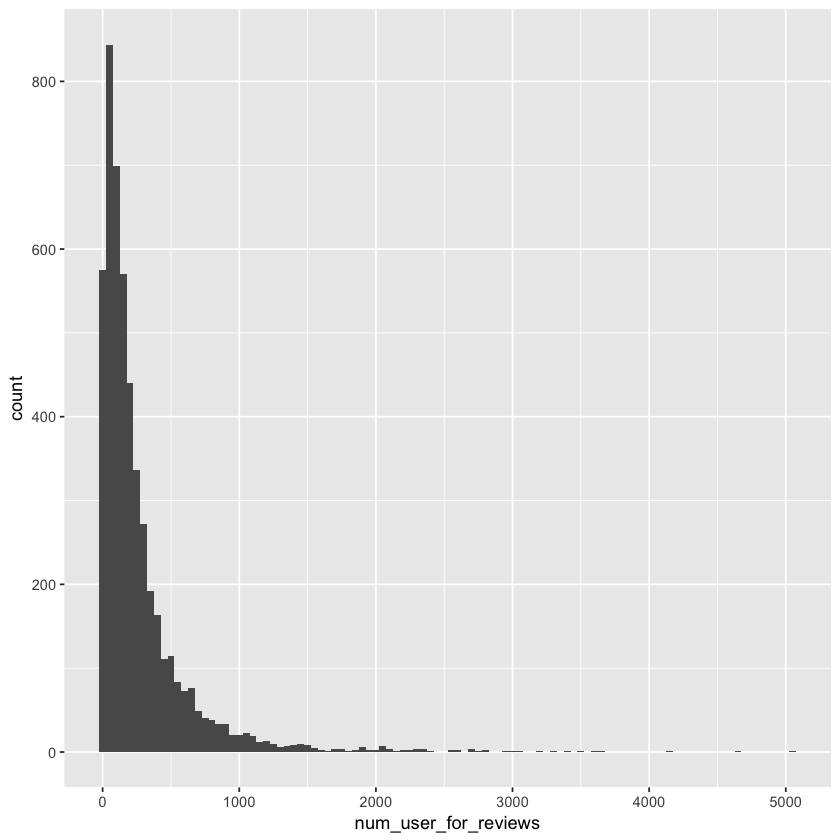

In [159]:
ggplot(imdb_user_reviews, aes(x = num_user_for_reviews)) +
    geom_histogram(binwidth = 50, na.rm = TRUE)

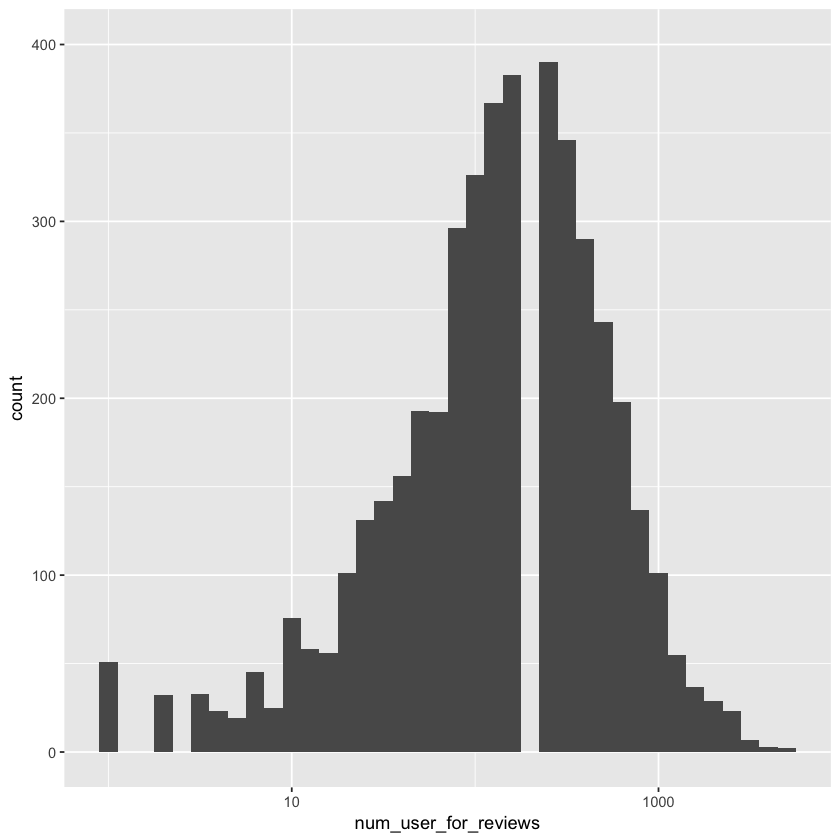

In [160]:
ggplot(imdb_user_reviews, aes(x = num_user_for_reviews)) +
    geom_histogram(binwidth = .1, na.rm = TRUE) +
    scale_x_log10() +
    ylim(0, 400)